# Import libraries and Data

In [4]:
# imports libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
#  Define current path and data path
current_path = os.path.dirname(os.path.abspath('__file__')) 
data_path = os.path.join(current_path, 'Data\diabetes_binary_health_indicators_BRFSS2015.csv')
# meta data: https://www.kaggle.com/code/alexteboul/diabetes-health-indicators-dataset-notebook/notebook
# import data into dataframe
diabetes_health_indicators_data = pd.read_csv(data_path)

# Helper Functions

## General

In [6]:
def separate_column_names_by_binary_and_nonbinary(df):
    """
    This function returns binary column name and non-binary column name based on describe method's min and max value.
    """
    binary_column_names = []
    nonbinary_column_names = []
    for column_name in df.columns:
        if df[column_name].describe().loc['min'] == 0 and df[column_name].describe().loc['max'] == 1:
            binary_column_names.append(column_name)
        else:
            nonbinary_column_names.append(column_name)
    return binary_column_names, nonbinary_column_names

## Plotting

In [7]:
def create_stacked_count_plot_for_categorical_variables(df, column_name, grouped_variable, title):
    """
    This function creates a stacked count plot for categorical variables.
    """
    color = ['blue', 'red']
    df.groupby([column_name, grouped_variable]).size().unstack().sort_values(by=column_name, ascending=True).plot(kind='bar', stacked=True, color=color, figsize=(10, 10))
    plt.title(title)
    plt.show()

In [8]:
def create_count_plot_for_categorical_variables(df, column_name, title):
    """
    This function creates count plot for categorical variables.
    """
    plt.figure(figsize=(10, 10))
    sns.countplot(x=column_name, data=df, order=df[column_name].value_counts().index)
    plt.title(title)
    plt.show()

In [9]:
def create_pi_chart_for_categorical_variables(df, column_name, title):
    """
    This function creates pi chart for categorical variables.
    """
    plt.figure(figsize=(10, 10))
    df[column_name].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(title)
    plt.show()

In [10]:
def create_heat_map(df, title):
    """
    This function creates heat map for variables.
    """
    plt.figure(figsize=(10, 10))
    cmap = LinearSegmentedColormap.from_list('', ['blue', 'white', 'red'])
    sns.heatmap(df.corr(), annot=True, cmap=cmap, vmin=-1, vmax=1)
    plt.title(title)
    plt.show()

In [11]:
def create_histogram(df, column_name, title, bins):
    """
    This function creates histogram for continuous variables.
    """
    plt.figure(figsize=(10, 10))
    sns.distplot(df[column_name], kde=True, bins=bins)
    plt.title(title)
    plt.show()

In [12]:
def create_ordered_heat_map_for_categorical_variables (df, column_name, target_variable, title, specify = None):
    """
    This function creates a ordered heat map for a categorical variable.
    """
    plt.figure(figsize=(8, 8))
    # if target variable does not have specify value, raise an error
    if specify != None and specify not in df[target_variable].unique():
        raise ValueError('Specify value is not in target variable')
    if specify != None:
       plt.figure(figsize=(4, 8))
       df = df[df[target_variable] == specify]
        #  Max verticle figsize is 8 :/
        # if df[target_variable].unique() >= 10:
        #     plt.figure(figsize=(4, 15))
    
    # plot the heatmap
    sns.heatmap(df.groupby([column_name, target_variable]).size().unstack(), 
                annot=True, fmt="d", cmap="YlGnBu")
    plt.title(title)
    plt.show()

In [13]:
def create_percentage_heatmap_for_categorical_variables(df, column_name, target_variable, title, drop = None):
    """
    This function creates a percentage of the target variable heatmap for a categorical variable.
    """
    # create a dataframe with the percentage of each category
    percentage_of_each_category = df.groupby([column_name, target_variable])[target_variable].count().unstack(column_name).fillna(0)
    # swap the columns to row
    percentage_of_each_category = percentage_of_each_category.T
    #  sum the total of each row
    percentage_of_each_category['Total'] = percentage_of_each_category.sum(axis=1)
    for columns in percentage_of_each_category.columns:
        percentage_of_each_category[columns] = (percentage_of_each_category[columns] / percentage_of_each_category['Total'])
    percentage_of_each_category.drop('Total', axis=1, inplace=True)
    
    plt.figure(figsize=(8, 8))
    # if target variable does not have drop value, raise an error
    if drop != None and drop not in df[target_variable].unique():
        raise ValueError('drop value is not in target variable')
    if drop != None:
        plt.figure(figsize=(4, 8)) 
        percentage_of_each_category.drop(drop, axis=1, inplace=True)
    
    # create a heatmap
    plt.title(title)
    sns.heatmap(percentage_of_each_category, 
                annot=True, fmt='.1%', cmap='YlGnBu', cbar=False)
    plt.show()

In [14]:
def create_box_plot_for_numeric_variables(data, target_variable, numeric_variable, title):
    """
    This function creates a box plot for a numeric variable.
    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=target_variable, y=numeric_variable, data=data)
    plt.title(title)
    plt.show()

In [15]:
def plot_confusion_matrix(y_test, y_pred, title):
    '''
    This function plots a confusion matrix
    '''
    # create a confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    #  plot the confusion matrix
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    plt.title(title, size = 15);
    plt.show()

In [16]:
def plot_roc_curve(y_test, y_pred, title):
    """
    Plots a ROC curve with AUC.
    """
    # Compute the false positive rate (FPR), true positive rate (TPR), and thresholds using roc_curve() function
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    # Compute the area under the ROC curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray',linestyle='--', lw=2, label='Baseline', alpha=0.5)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()

# Data Cleaning

## Check for Missing Values

In [17]:
# check for missing values
print("\nMissing Values")
display(diabetes_health_indicators_data.isnull().sum().to_frame().reset_index(drop=False).rename(columns={'index':'column_name', 0:'missing_values'}))


Missing Values


,column_name,missing_values
0,Diabetes_binary,0
1,HighBP,0
2,HighChol,0
3,CholCheck,0
4,BMI,0
5,Smoker,0
6,Stroke,0
7,HeartDiseaseorAttack,0
8,PhysActivity,0
9,Fruits,0


## Check for duplicates

In [18]:
# check for duplicated values
print("\nDuplicated Values")
display(diabetes_health_indicators_data.duplicated().sum())
# no id as identifier, possible to have duplicated values


Duplicated Values


24206

# Exploratory Data Analysis (EDA)

## View Data

In [19]:
# view data
print("Data Preview")
display(diabetes_health_indicators_data.iloc[:,0:20])
display(diabetes_health_indicators_data.iloc[:,20:])
# check for column names
print("\nColumn Preview")
display(diabetes_health_indicators_data.columns.to_frame().reset_index(drop=True).rename(columns={0:'column_name'}))

Data Preview


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0


,Education,Income
0,4.0,3.0
1,6.0,1.0
2,4.0,8.0
3,3.0,6.0
4,5.0,4.0
...,...,...
253675,6.0,7.0
253676,2.0,4.0
253677,5.0,2.0
253678,5.0,1.0



Column Preview


,column_name
0,Diabetes_binary
1,HighBP
2,HighChol
3,CholCheck
4,BMI
5,Smoker
6,Stroke
7,HeartDiseaseorAttack
8,PhysActivity
9,Fruits


## Column Specific Statistics

In [20]:
#binary variables filter
diabetes_health_indicators_data_binary_columns, diabetes_health_indicators_data_non_binary_columns = separate_column_names_by_binary_and_nonbinary(diabetes_health_indicators_data)
print("\nBinary Columns")
display(diabetes_health_indicators_data_binary_columns)
print('number of binary columns: ', len(diabetes_health_indicators_data_binary_columns))
print("\nNon-Binary Columns")
display(diabetes_health_indicators_data_non_binary_columns)
print('number of non-binary columns: ', len(diabetes_health_indicators_data_non_binary_columns))


Binary Columns


['Diabetes_binary',
 'HighBP',
 'HighChol',
 'CholCheck',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'DiffWalk',
 'Sex']

number of binary columns:  15

Non-Binary Columns


['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

number of non-binary columns:  7


In [21]:
# check if data is ordinal or nominal
print("\nNumerical Ordinal Columns Check")
display(diabetes_health_indicators_data[diabetes_health_indicators_data_non_binary_columns].describe())
display(diabetes_health_indicators_data[diabetes_health_indicators_data_non_binary_columns].astype('object').describe().loc[['count', 'unique']])
# conclusion: GenHlth, Age, Education, Income are ordinal variables
diabetes_health_indicators_data_ordinal_columns = ['GenHlth', 'Age', 'Education', 'Income']
diabetes_health_indicators_data_numeric_columns = [column_name for column_name in diabetes_health_indicators_data_non_binary_columns if column_name not in diabetes_health_indicators_data_ordinal_columns]
print("\nNumerical Columns")
display(diabetes_health_indicators_data_numeric_columns)
print('number of numerical columns: ', len(diabetes_health_indicators_data_numeric_columns))
print("\nOrdinal Columns")
display(diabetes_health_indicators_data_ordinal_columns)
print('number of ordinal columns: ', len(diabetes_health_indicators_data_ordinal_columns))


Numerical Ordinal Columns Check


,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,28.382364,2.511392,3.184772,4.242081,8.032119,5.050434,6.053875
std,6.608694,1.068477,7.412847,8.717951,3.054220,0.985774,2.071148
min,12.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,24.000000,2.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,27.000000,2.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,31.000000,3.000000,2.000000,3.000000,10.000000,6.000000,8.000000
max,98.000000,5.000000,30.000000,30.000000,13.000000,6.000000,8.000000


,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income
count,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0
unique,84.0,5.0,31.0,31.0,13.0,6.0,8.0



Numerical Columns


['BMI', 'MentHlth', 'PhysHlth']

number of numerical columns:  3

Ordinal Columns


['GenHlth', 'Age', 'Education', 'Income']

number of ordinal columns:  4


In [22]:
#  summary of data
print("Summary of data")
print("Summary of data for numeric columns")
display(diabetes_health_indicators_data[diabetes_health_indicators_data_numeric_columns].describe())
print('Summary of data for ordinal columns')
display(diabetes_health_indicators_data[diabetes_health_indicators_data_ordinal_columns].astype('object').describe())
print("Summary of data for binary columns")
# change binary columns to object type
diabetes_health_indicators_data_object_type = diabetes_health_indicators_data[diabetes_health_indicators_data_binary_columns].astype('object')
display(diabetes_health_indicators_data_object_type.iloc[:,:8].describe())
display(diabetes_health_indicators_data_object_type.iloc[:,8:].describe())

Summary of data
Summary of data for numeric columns


,BMI,MentHlth,PhysHlth
count,253680.000000,253680.000000,253680.000000
mean,28.382364,3.184772,4.242081
std,6.608694,7.412847,8.717951
min,12.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000
75%,31.000000,2.000000,3.000000
max,98.000000,30.000000,30.000000


Summary of data for ordinal columns


,GenHlth,Age,Education,Income
count,253680.0,253680.0,253680.0,253680.0
unique,5.0,13.0,6.0,8.0
top,2.0,9.0,6.0,8.0
freq,89084.0,33244.0,107325.0,90385.0


Summary of data for binary columns


,Diabetes_binary,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity
count,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0
unique,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
top,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
freq,218334.0,144851.0,146089.0,244210.0,141257.0,243388.0,229787.0,191920.0


,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,DiffWalk,Sex
count,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0,253680.0
unique,2.0,2.0,2.0,2.0,2.0,2.0,2.0
top,1.0,1.0,0.0,1.0,0.0,0.0,0.0
freq,160898.0,205841.0,239424.0,241263.0,232326.0,211005.0,141974.0


## EDA on Specific Columns

### Categorical Variables

#### Binary Categorical Variables

##### HeatMap of Categorical Variables and Binary Target Variable

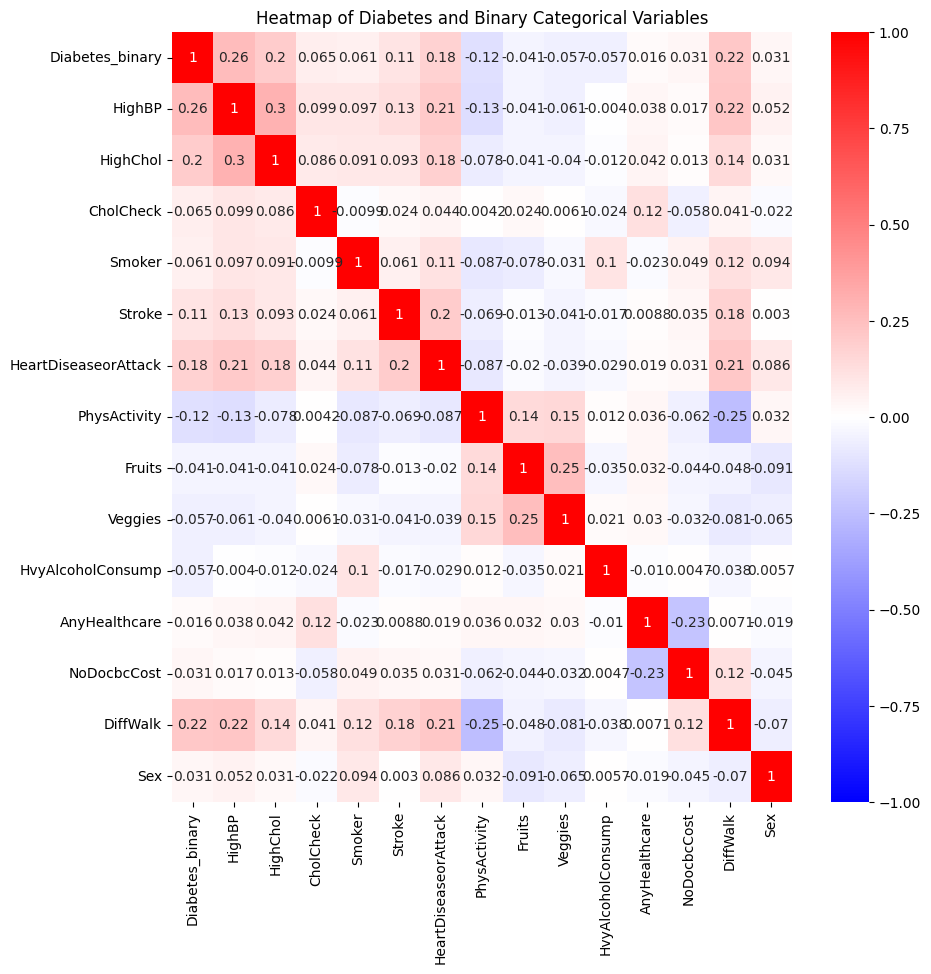

In [23]:
create_heat_map(diabetes_health_indicators_data[diabetes_health_indicators_data_binary_columns],
                'Heatmap of Diabetes and Binary Categorical Variables') 

##### Target Variable - Diabetes_binary

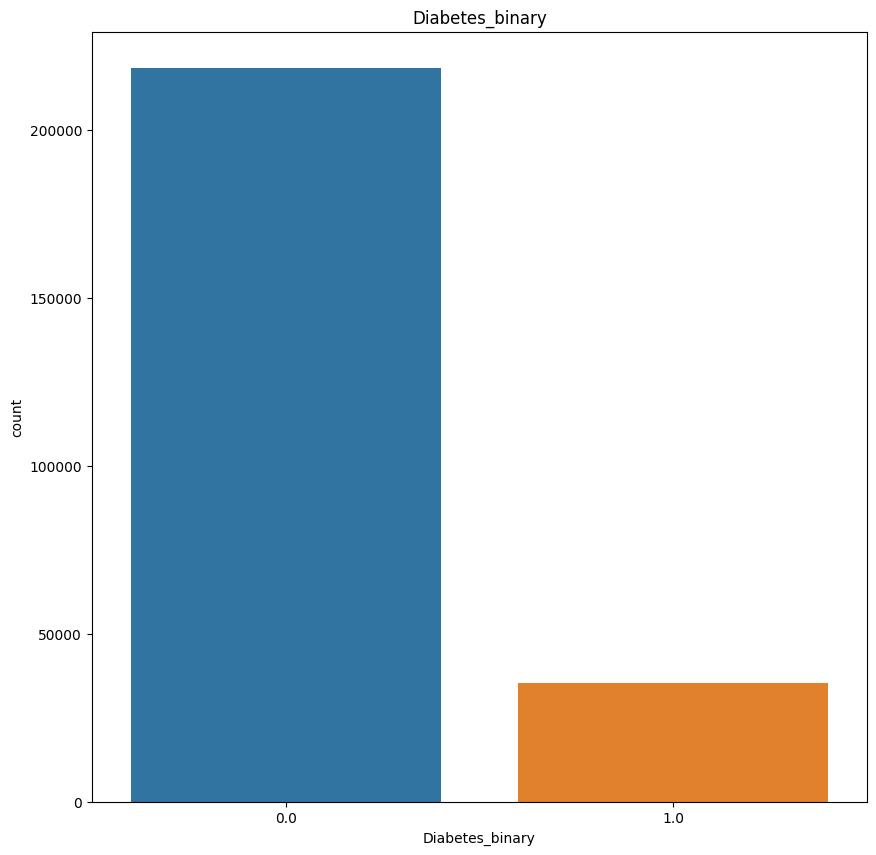

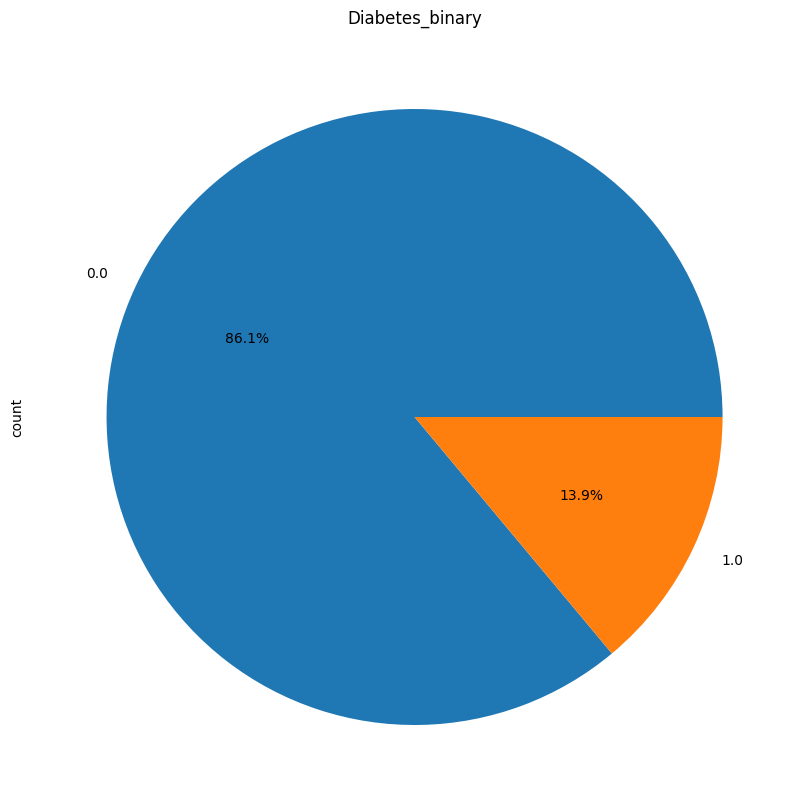

In [24]:
# plot a count plot and a pi chart for diabetes_binary
create_count_plot_for_categorical_variables(diabetes_health_indicators_data, 'Diabetes_binary', 'Diabetes_binary')
create_pi_chart_for_categorical_variables(diabetes_health_indicators_data, 'Diabetes_binary', 'Diabetes_binary')

##### Variable 1 - HighBP

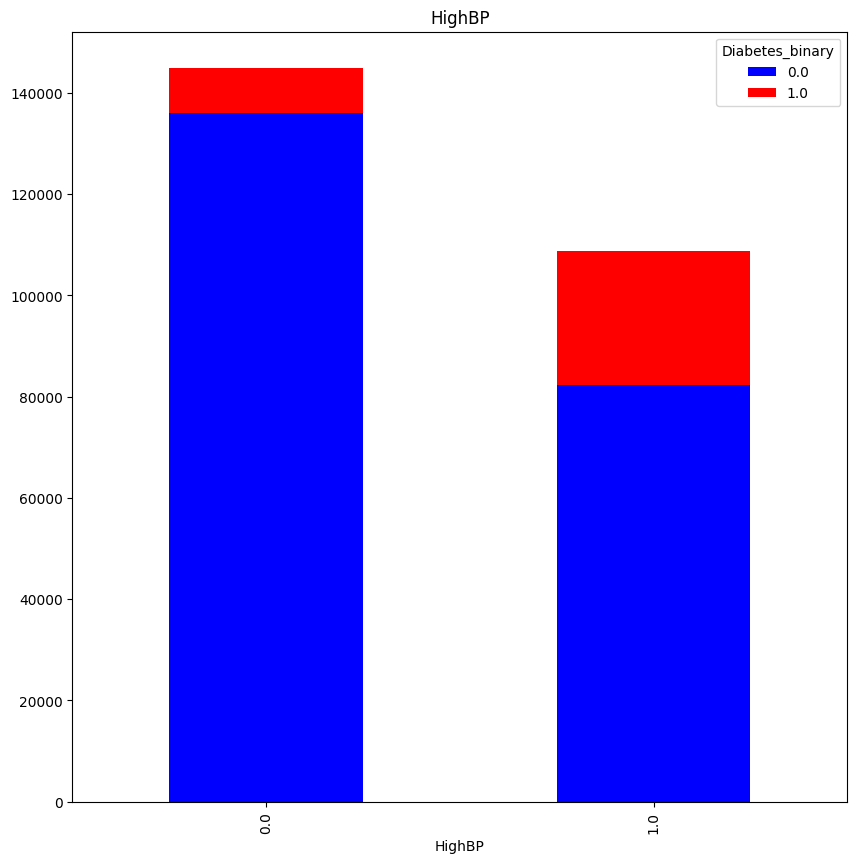

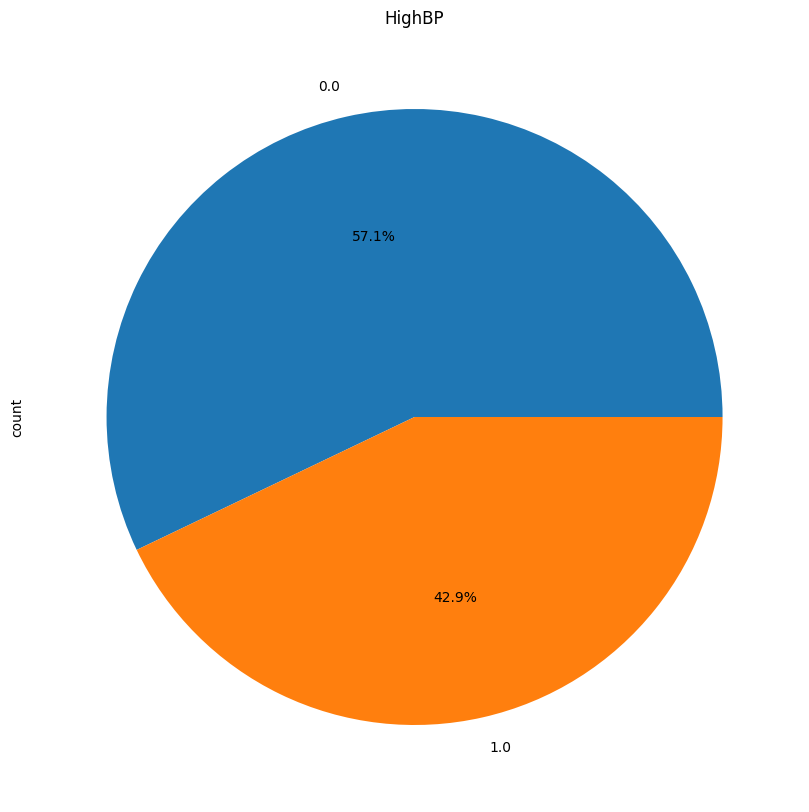

<Figure size 800x800 with 0 Axes>

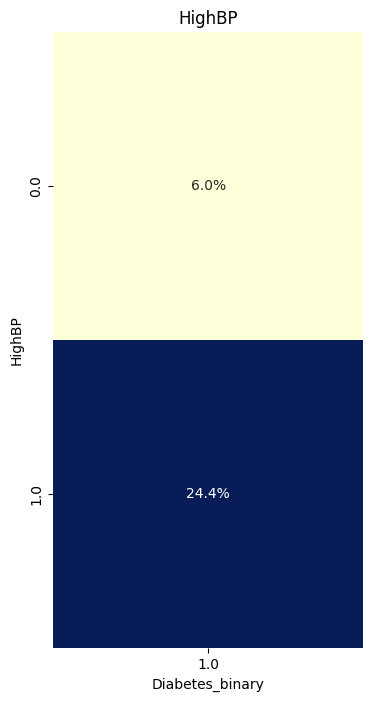

In [25]:
# plot a stacked count plot, pi chart, and a percentage heatmap for HighBP
create_stacked_count_plot_for_categorical_variables(diabetes_health_indicators_data, 'HighBP' , 'Diabetes_binary', 'HighBP')
create_pi_chart_for_categorical_variables(diabetes_health_indicators_data, 'HighBP', 'HighBP')
create_percentage_heatmap_for_categorical_variables(diabetes_health_indicators_data, 'HighBP', 'Diabetes_binary', 'HighBP', 0)

##### Variable 2 - HighChol

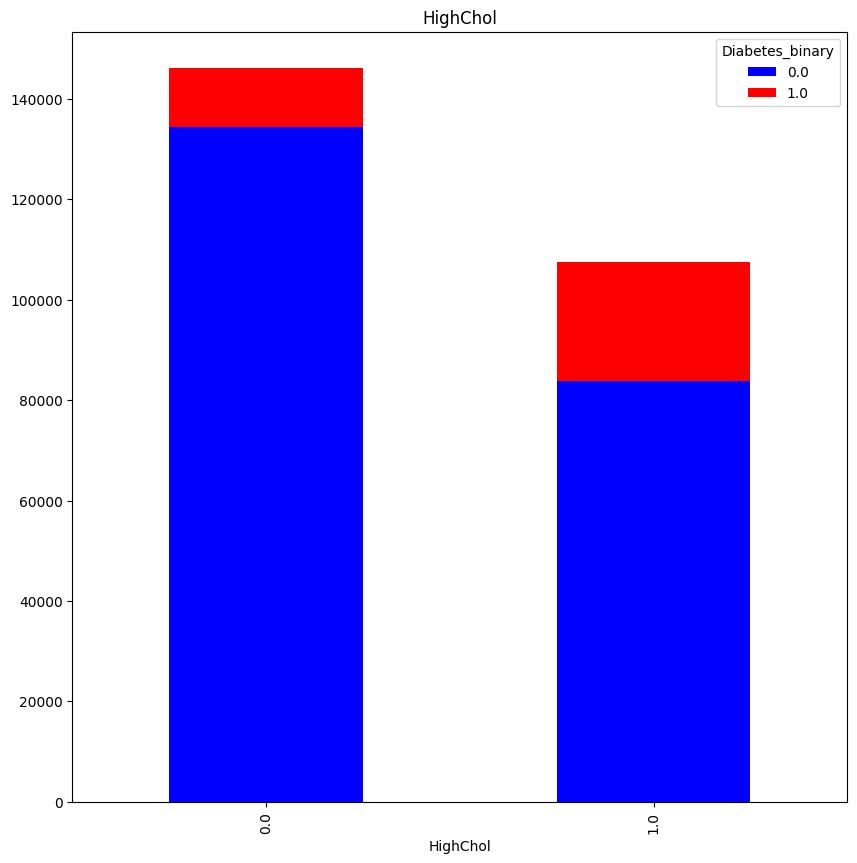

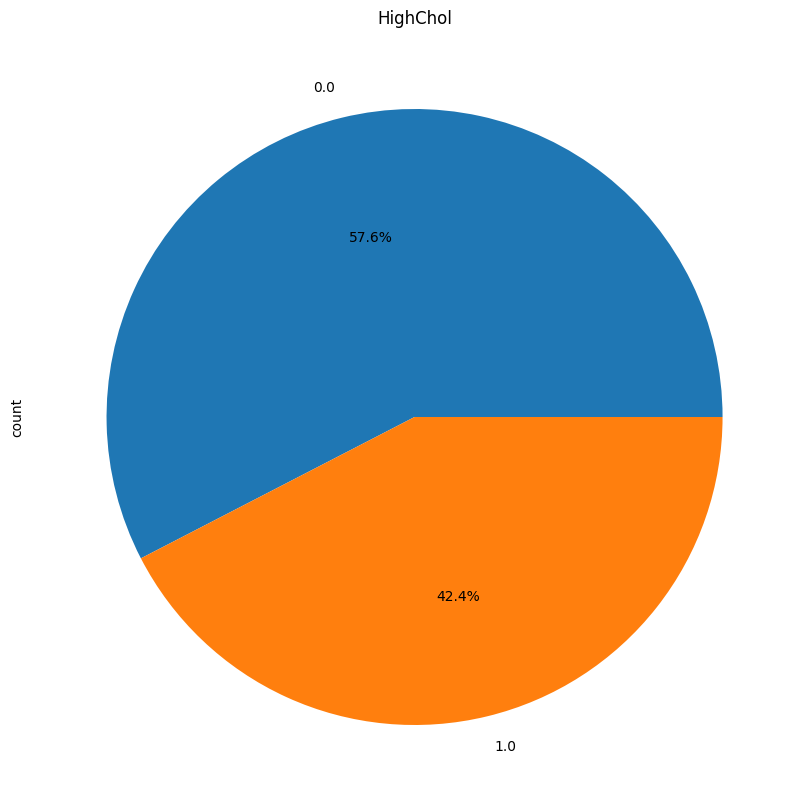

<Figure size 800x800 with 0 Axes>

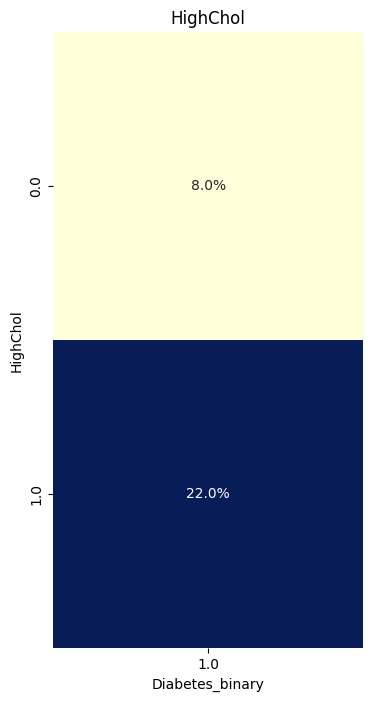

In [26]:
# plot a stacked count plot, pi chart, and a percentage heatmap for HighChol
create_stacked_count_plot_for_categorical_variables(diabetes_health_indicators_data, 'HighChol' , 'Diabetes_binary', 'HighChol')
create_pi_chart_for_categorical_variables(diabetes_health_indicators_data, 'HighChol', 'HighChol')
create_percentage_heatmap_for_categorical_variables(diabetes_health_indicators_data, 'HighChol', 'Diabetes_binary', 'HighChol', 0)

##### Variable 3 - CholCheck

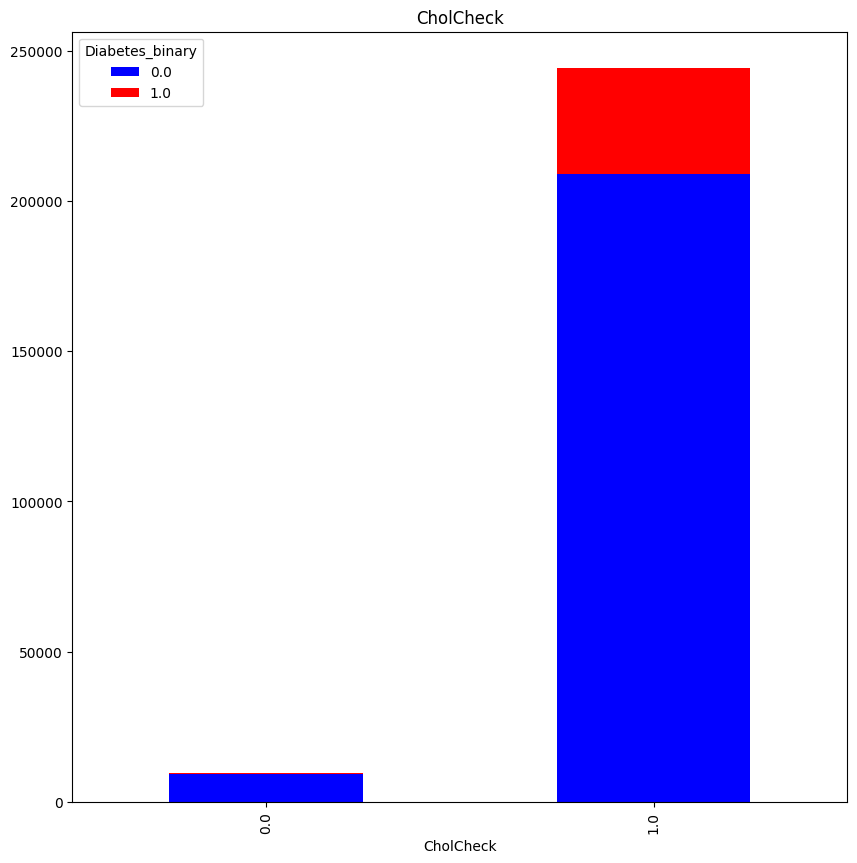

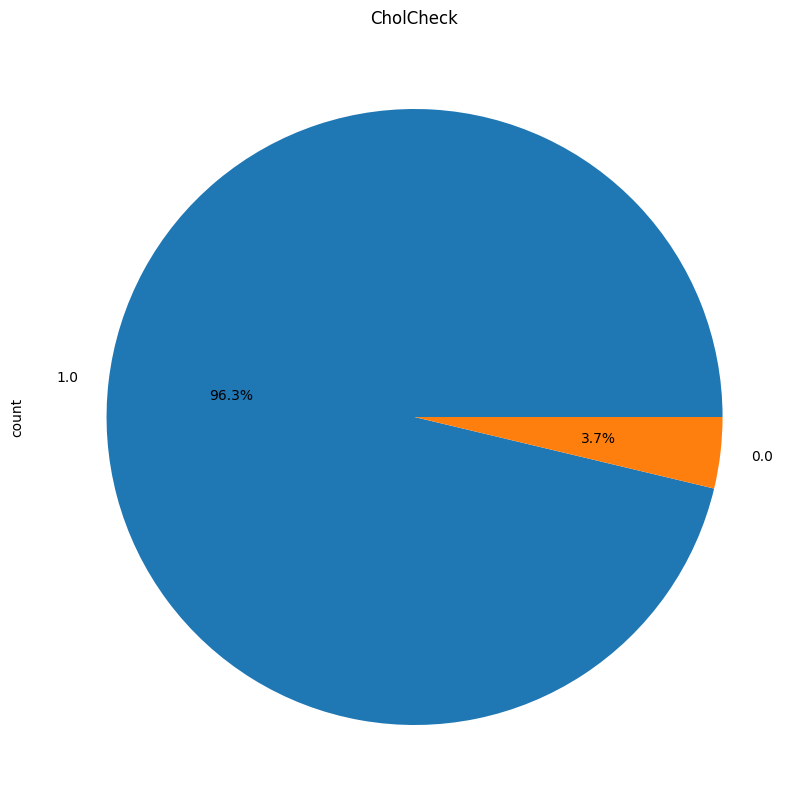

<Figure size 800x800 with 0 Axes>

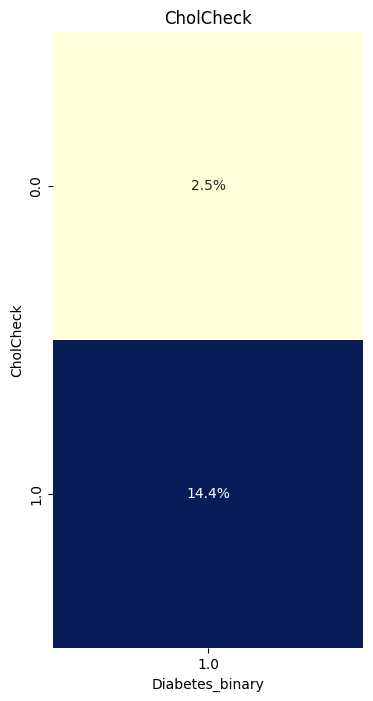

In [27]:
# plot a stacked count plot, pi chart, and a percentage heatmap for CholCheck
create_stacked_count_plot_for_categorical_variables(diabetes_health_indicators_data, 'CholCheck' , 'Diabetes_binary', 'CholCheck')
create_pi_chart_for_categorical_variables(diabetes_health_indicators_data, 'CholCheck', 'CholCheck')
create_percentage_heatmap_for_categorical_variables(diabetes_health_indicators_data, 'CholCheck', 'Diabetes_binary', 'CholCheck', 0)

##### Variable 4 - Smoker

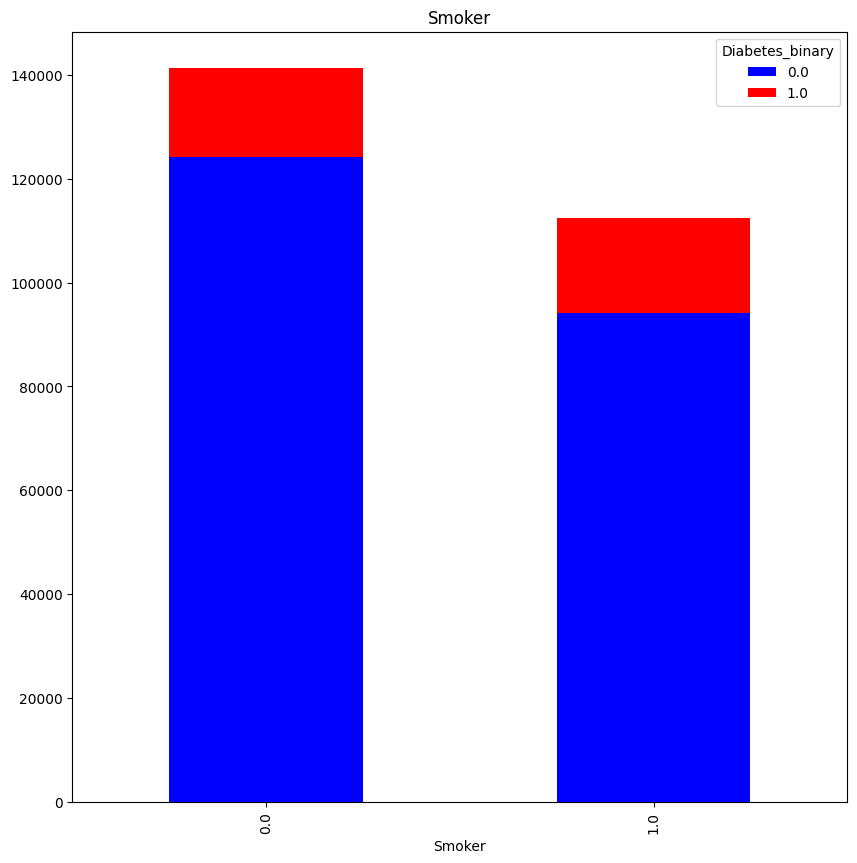

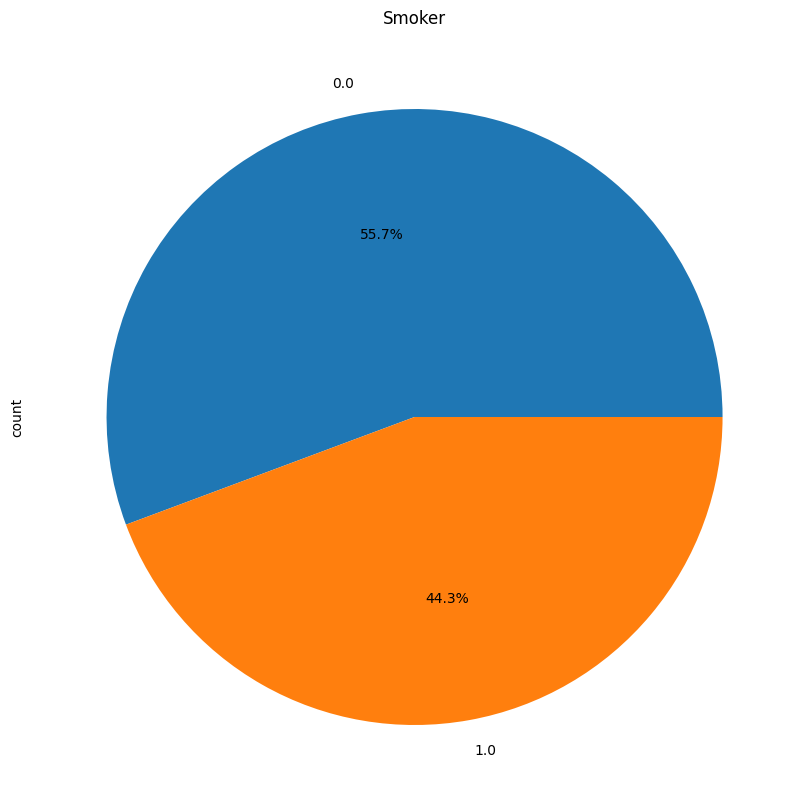

<Figure size 800x800 with 0 Axes>

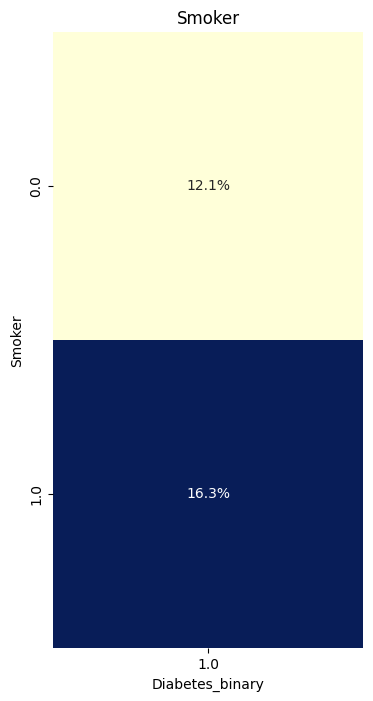

In [28]:
# plot a stacked count plot, pi chart, and a percentage heatmap for Smoker
create_stacked_count_plot_for_categorical_variables(diabetes_health_indicators_data, 'Smoker' , 'Diabetes_binary', 'Smoker')
create_pi_chart_for_categorical_variables(diabetes_health_indicators_data, 'Smoker', 'Smoker')
create_percentage_heatmap_for_categorical_variables(diabetes_health_indicators_data, 'Smoker', 'Diabetes_binary', 'Smoker', 0)

##### Variable 5 - Stroke

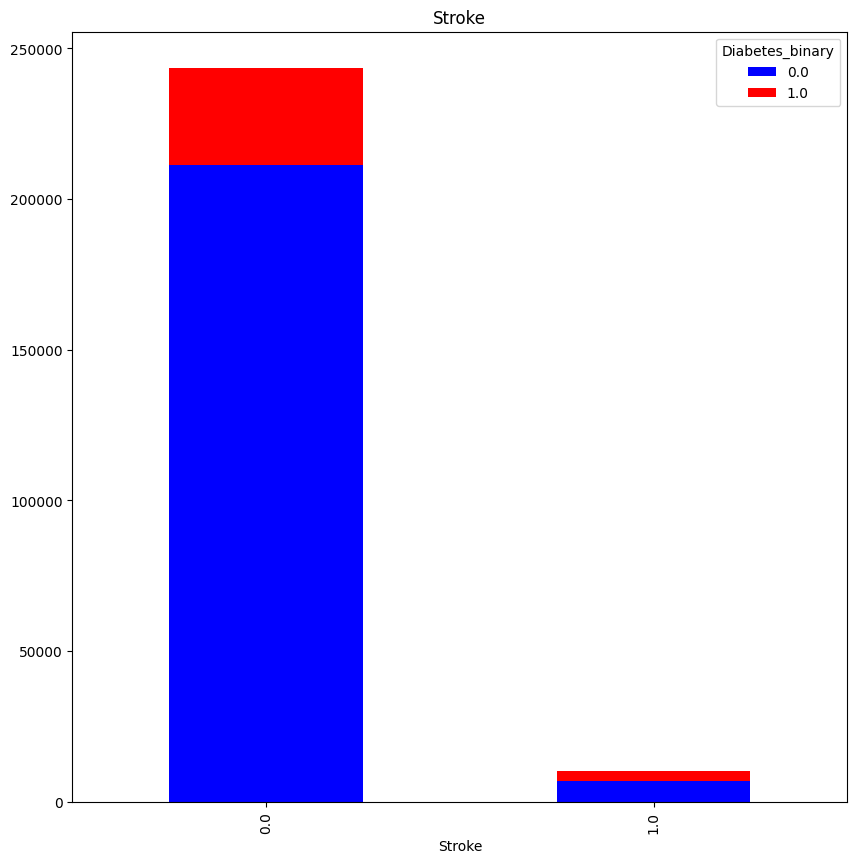

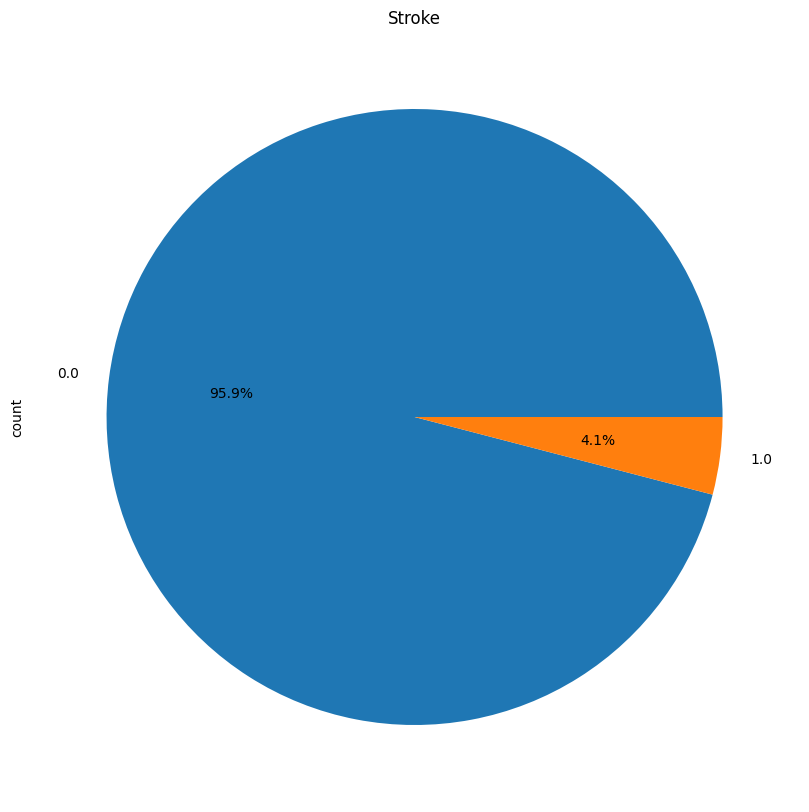

<Figure size 800x800 with 0 Axes>

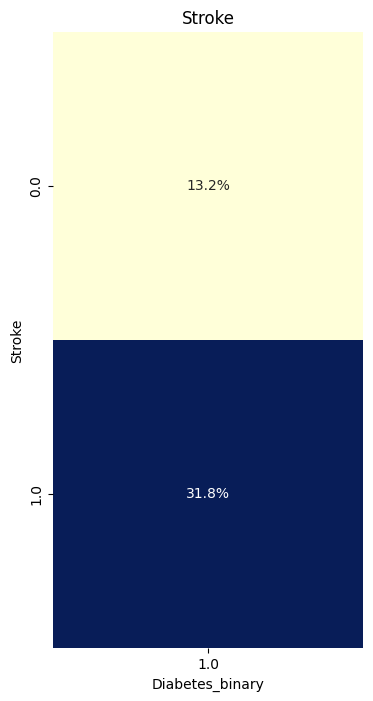

In [29]:
# plot a stacked count plot, pi chart, and a percentage heatmap for Stroke
create_stacked_count_plot_for_categorical_variables(diabetes_health_indicators_data, 'Stroke' , 'Diabetes_binary', 'Stroke')
create_pi_chart_for_categorical_variables(diabetes_health_indicators_data, 'Stroke', 'Stroke')
create_percentage_heatmap_for_categorical_variables(diabetes_health_indicators_data, 'Stroke', 'Diabetes_binary', 'Stroke', 0)

##### Variable 6 - HeartDiseaseorAttack

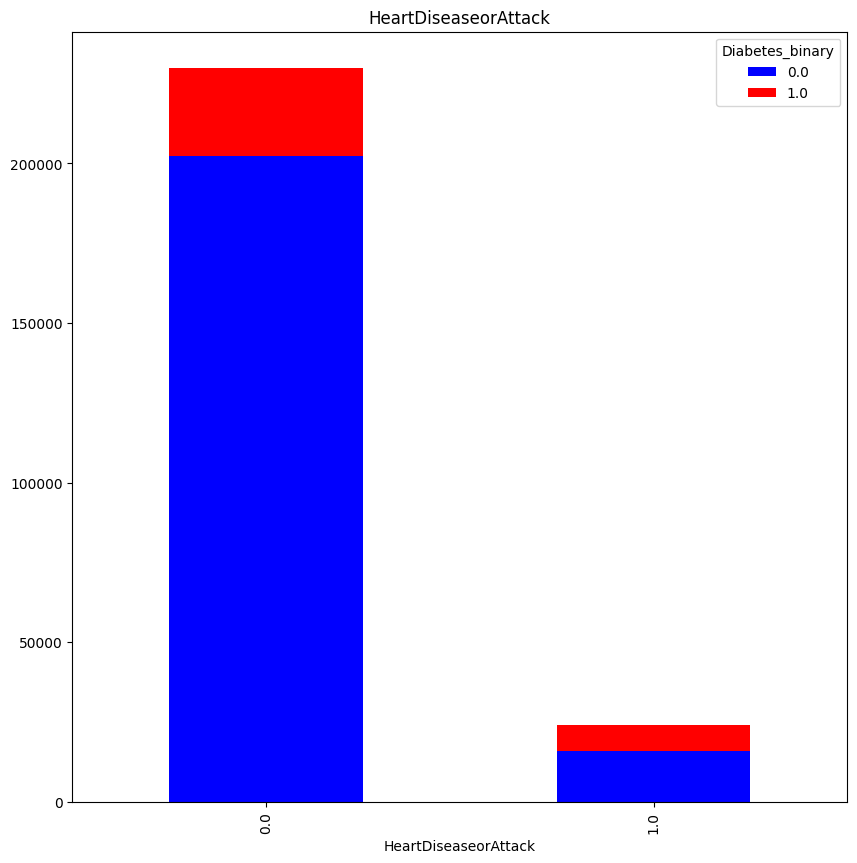

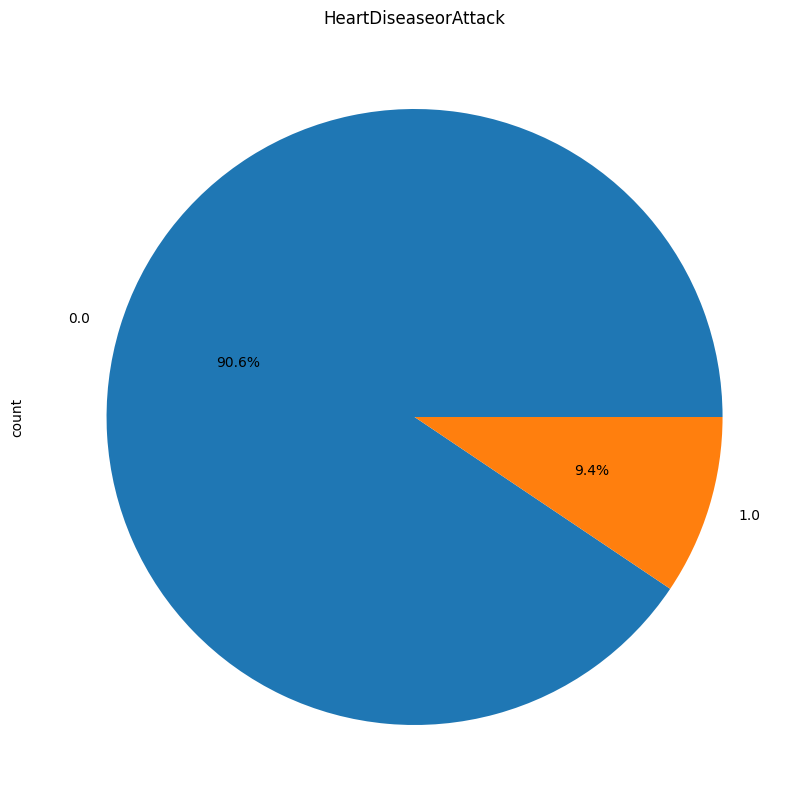

<Figure size 800x800 with 0 Axes>

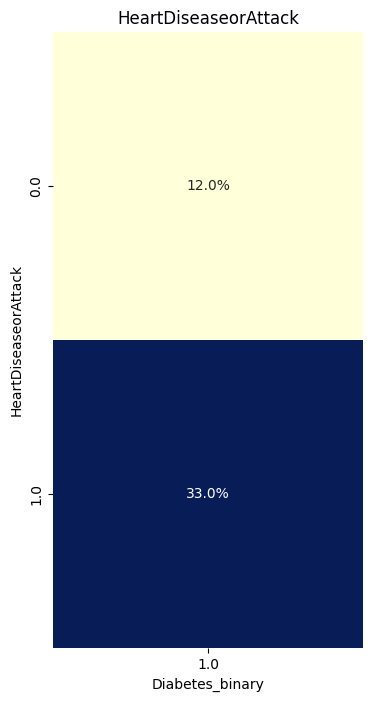

In [30]:
# plot a stacked count plot, pi chart, and a percentage heatmap for HeartDiseaseorAttack
create_stacked_count_plot_for_categorical_variables(diabetes_health_indicators_data, 'HeartDiseaseorAttack' , 'Diabetes_binary', 'HeartDiseaseorAttack')
create_pi_chart_for_categorical_variables(diabetes_health_indicators_data, 'HeartDiseaseorAttack', 'HeartDiseaseorAttack')
create_percentage_heatmap_for_categorical_variables(diabetes_health_indicators_data, 'HeartDiseaseorAttack', 'Diabetes_binary', 'HeartDiseaseorAttack', 0)

##### Variable 7 - PhysActivity

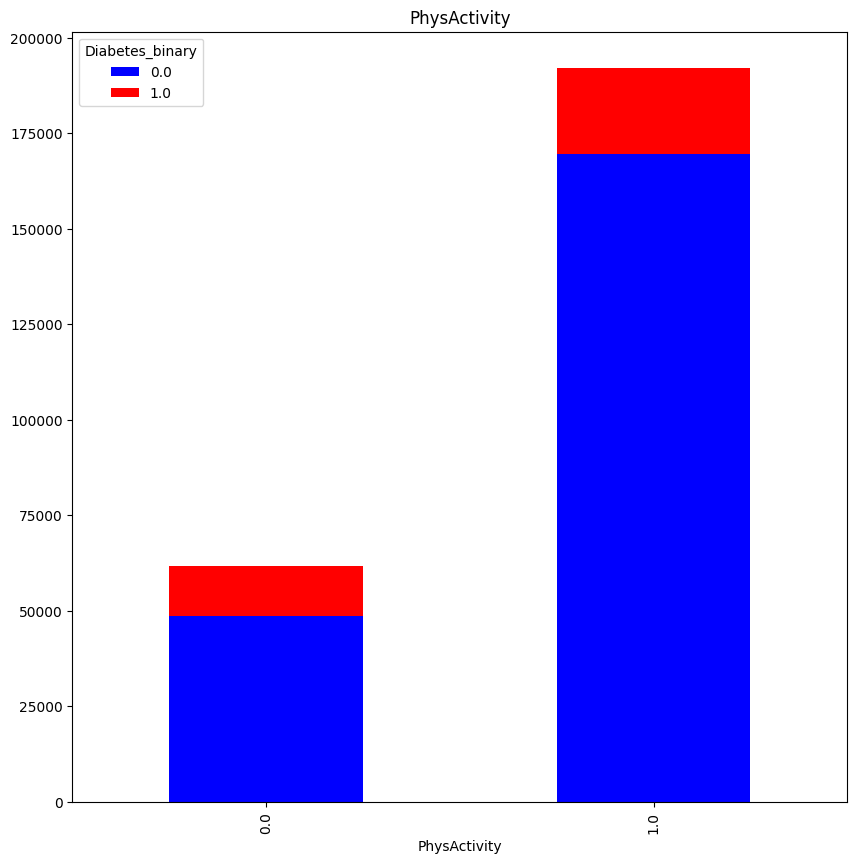

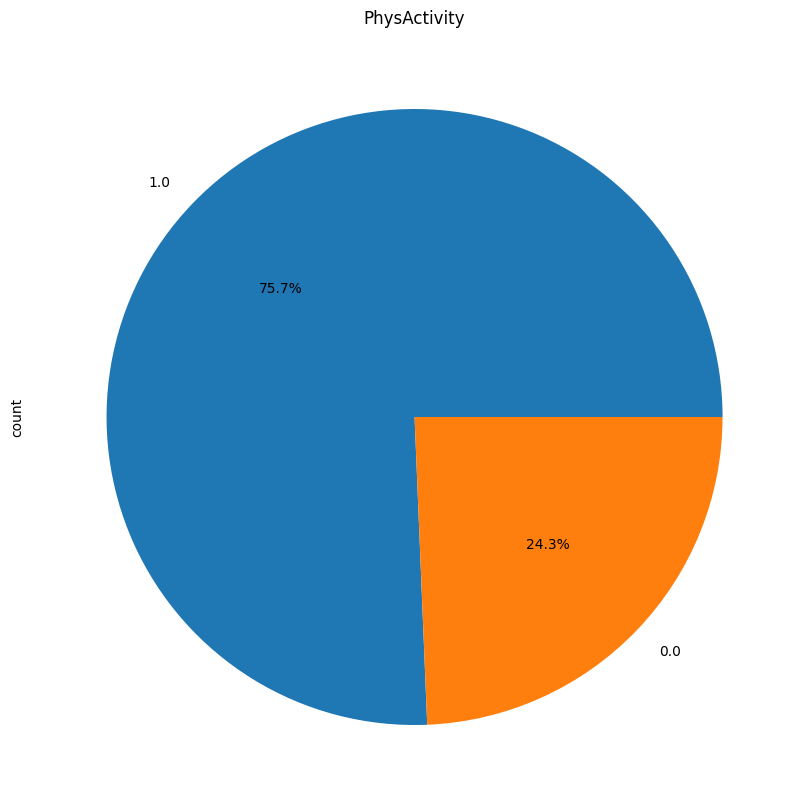

<Figure size 800x800 with 0 Axes>

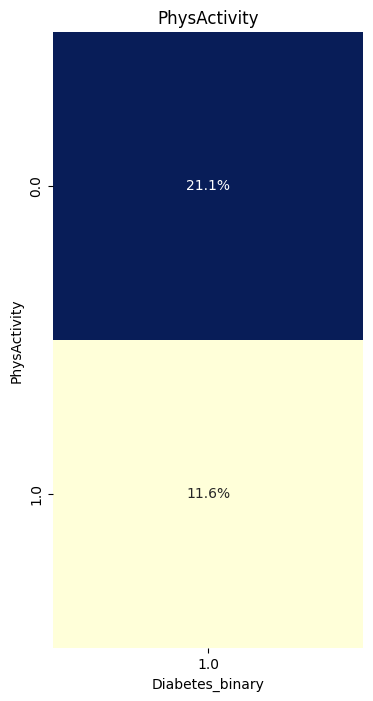

In [31]:
# plot a stacked count plot, pi chart, and a percentage heatmap for PhysActivity
create_stacked_count_plot_for_categorical_variables(diabetes_health_indicators_data, 'PhysActivity' , 'Diabetes_binary', 'PhysActivity')
create_pi_chart_for_categorical_variables(diabetes_health_indicators_data, 'PhysActivity', 'PhysActivity')
create_percentage_heatmap_for_categorical_variables(diabetes_health_indicators_data, 'PhysActivity', 'Diabetes_binary', 'PhysActivity', 0)

##### Variable 8 - Fruits

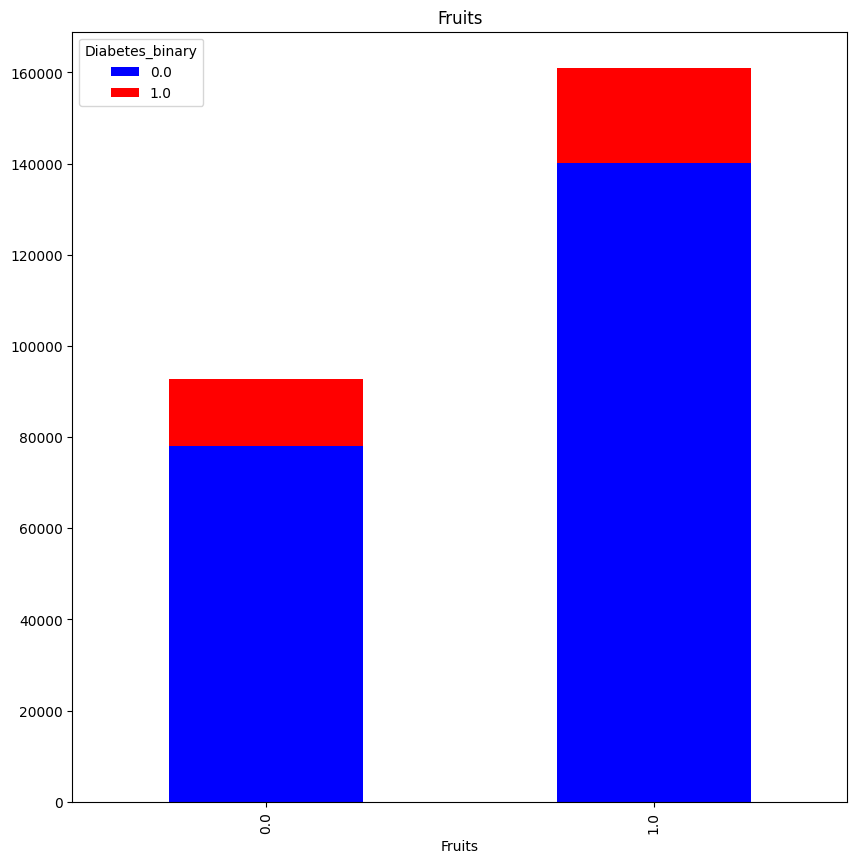

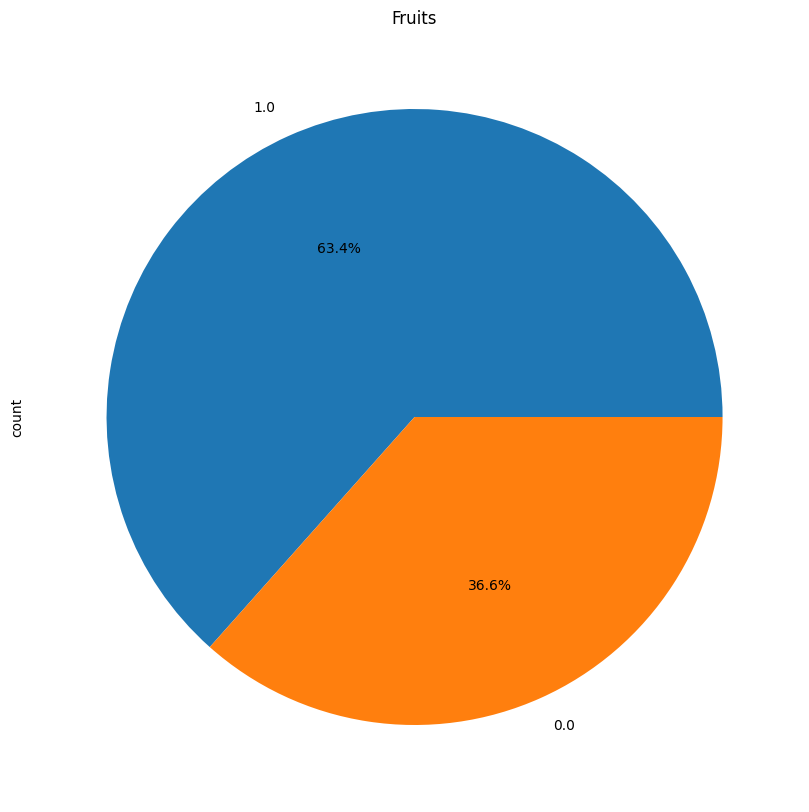

<Figure size 800x800 with 0 Axes>

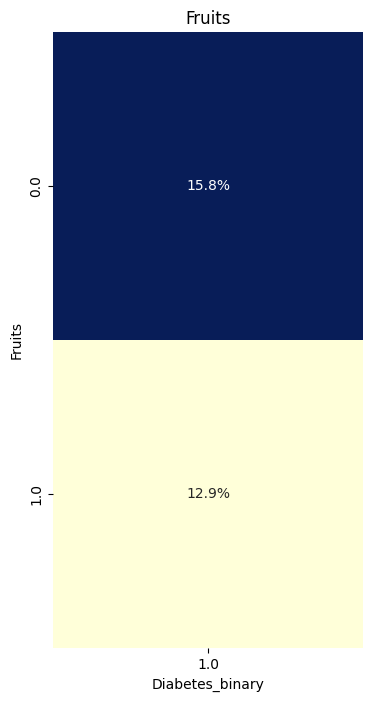

In [32]:
# plot a stacked count plot, pi chart, and a percentage heatmap for Fruits
create_stacked_count_plot_for_categorical_variables(diabetes_health_indicators_data, 'Fruits' , 'Diabetes_binary', 'Fruits')
create_pi_chart_for_categorical_variables(diabetes_health_indicators_data, 'Fruits', 'Fruits')
create_percentage_heatmap_for_categorical_variables(diabetes_health_indicators_data, 'Fruits', 'Diabetes_binary', 'Fruits', 0)

##### Variable 9 - Veggies

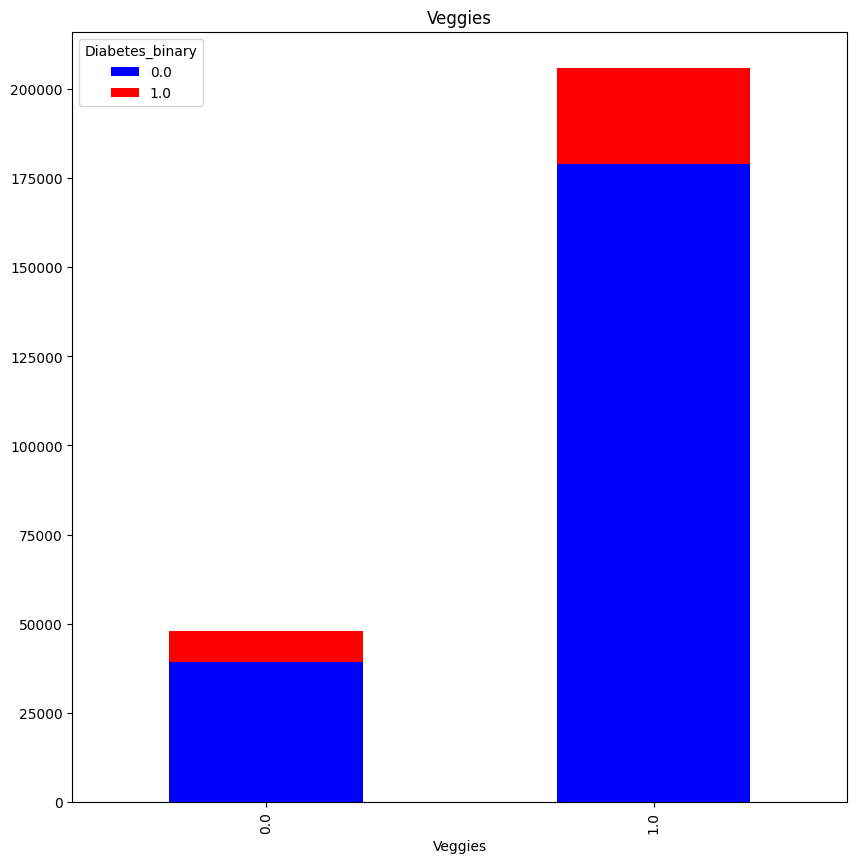

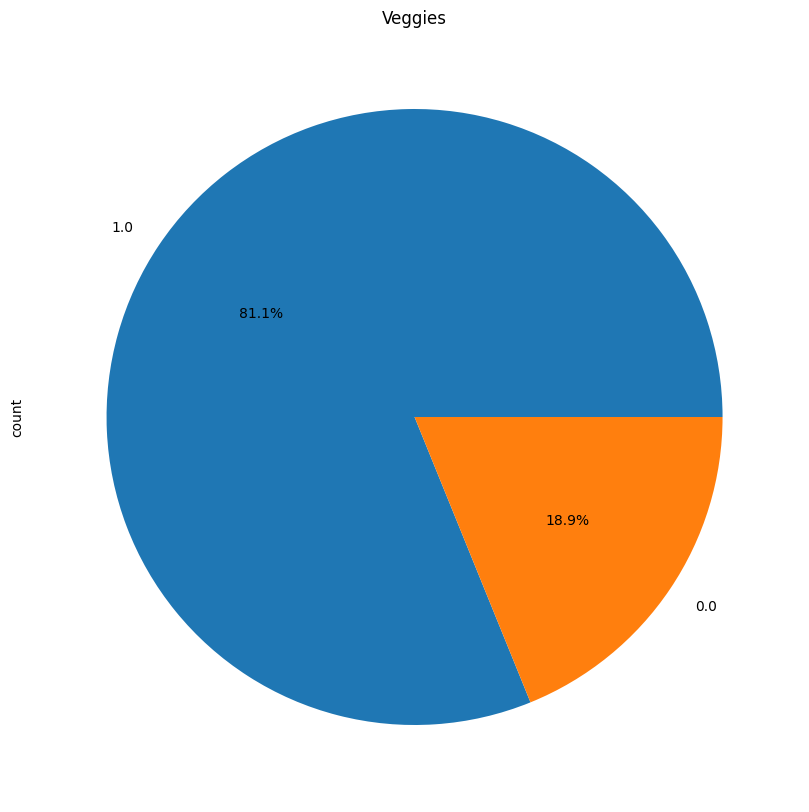

<Figure size 800x800 with 0 Axes>

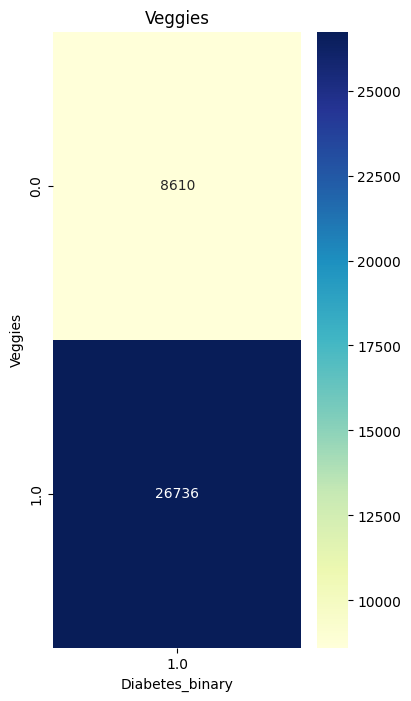

In [33]:
# plot a stacked count plot, pi chart, and a percentage heatmap for Veggies
create_stacked_count_plot_for_categorical_variables(diabetes_health_indicators_data, 'Veggies' , 'Diabetes_binary', 'Veggies')
create_pi_chart_for_categorical_variables(diabetes_health_indicators_data, 'Veggies', 'Veggies')
create_ordered_heat_map_for_categorical_variables(diabetes_health_indicators_data, 'Veggies', 'Diabetes_binary', 'Veggies', 1)

##### Variable 10 - HvyAlcoholConsump

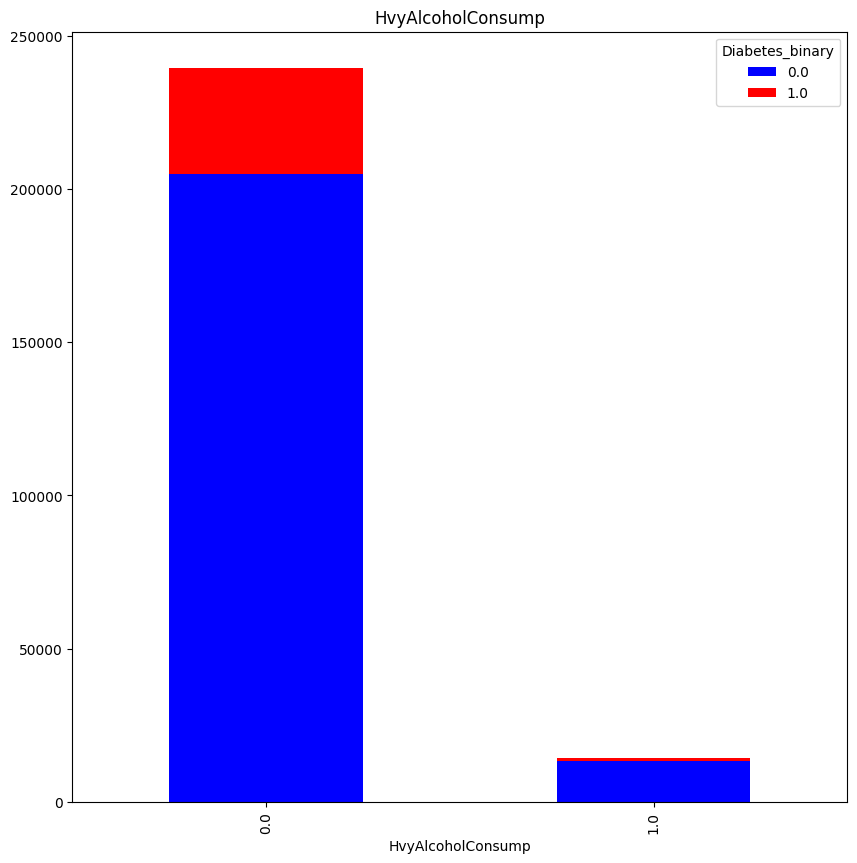

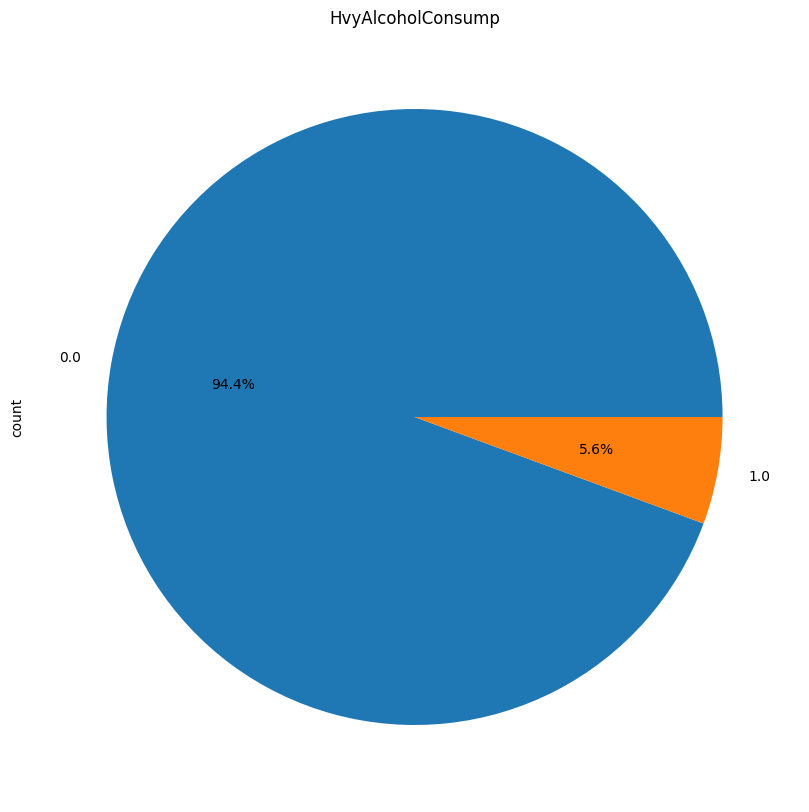

<Figure size 800x800 with 0 Axes>

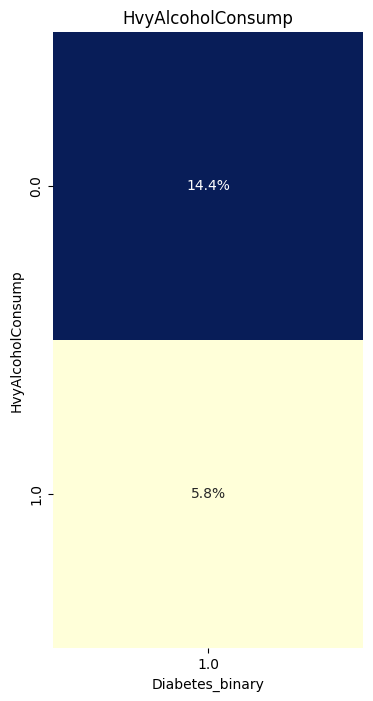

In [34]:
# plot a stacked count plot, pi chart, and a percentage heatmap for HvyAlcoholConsump
create_stacked_count_plot_for_categorical_variables(diabetes_health_indicators_data, 'HvyAlcoholConsump' , 'Diabetes_binary', 'HvyAlcoholConsump')
create_pi_chart_for_categorical_variables(diabetes_health_indicators_data, 'HvyAlcoholConsump', 'HvyAlcoholConsump')
create_percentage_heatmap_for_categorical_variables(diabetes_health_indicators_data, 'HvyAlcoholConsump', 'Diabetes_binary', 'HvyAlcoholConsump', 0)

##### Variable 11 - NoDocbcCost

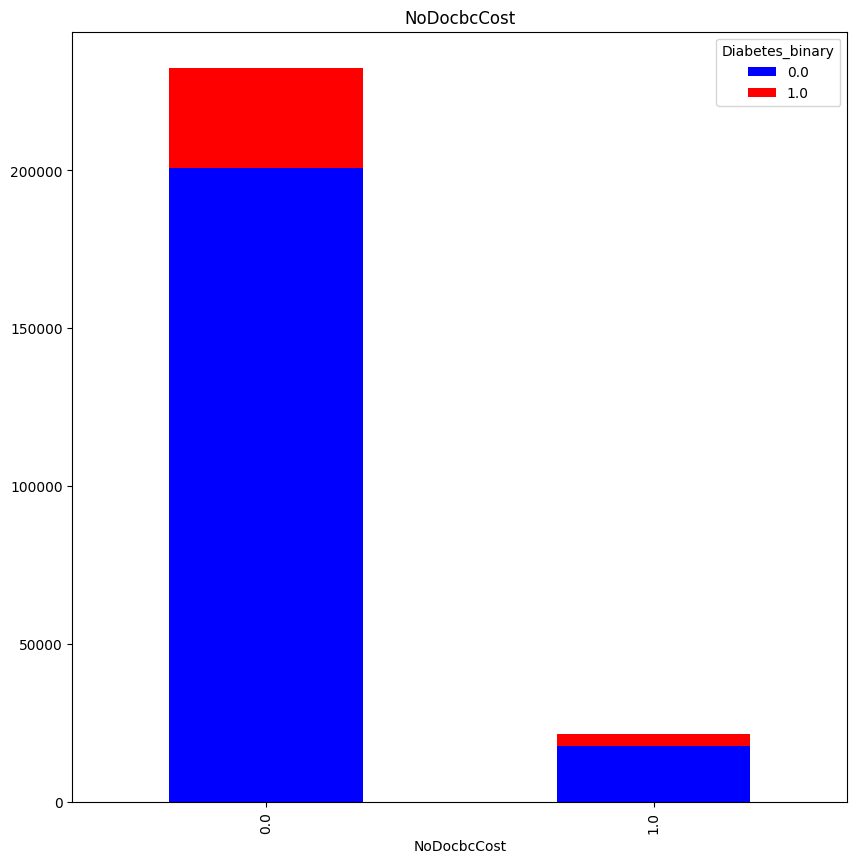

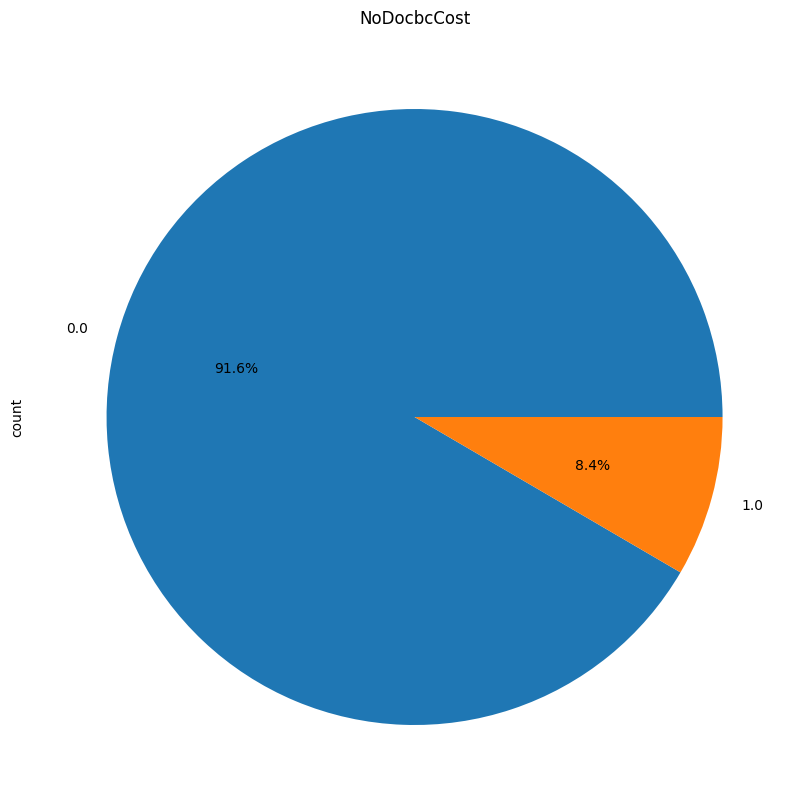

<Figure size 800x800 with 0 Axes>

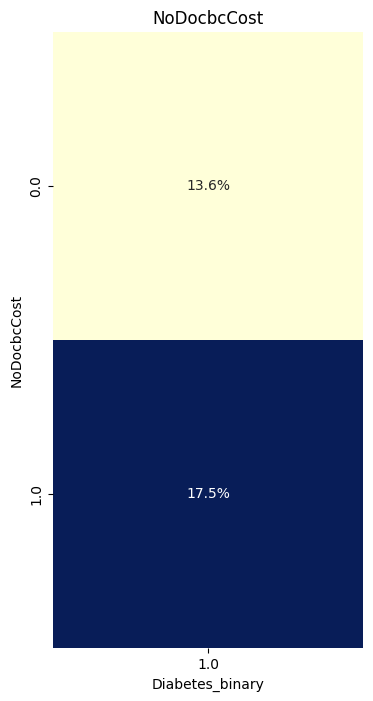

In [35]:
# plot a stacked count plot, pi chart, and a percentage heatmap for NoDocbcCost
create_stacked_count_plot_for_categorical_variables(diabetes_health_indicators_data, 'NoDocbcCost' , 'Diabetes_binary', 'NoDocbcCost')
create_pi_chart_for_categorical_variables(diabetes_health_indicators_data, 'NoDocbcCost', 'NoDocbcCost')
create_percentage_heatmap_for_categorical_variables(diabetes_health_indicators_data, 'NoDocbcCost', 'Diabetes_binary', 'NoDocbcCost', 0)

##### Variable 12 - DiffWalk

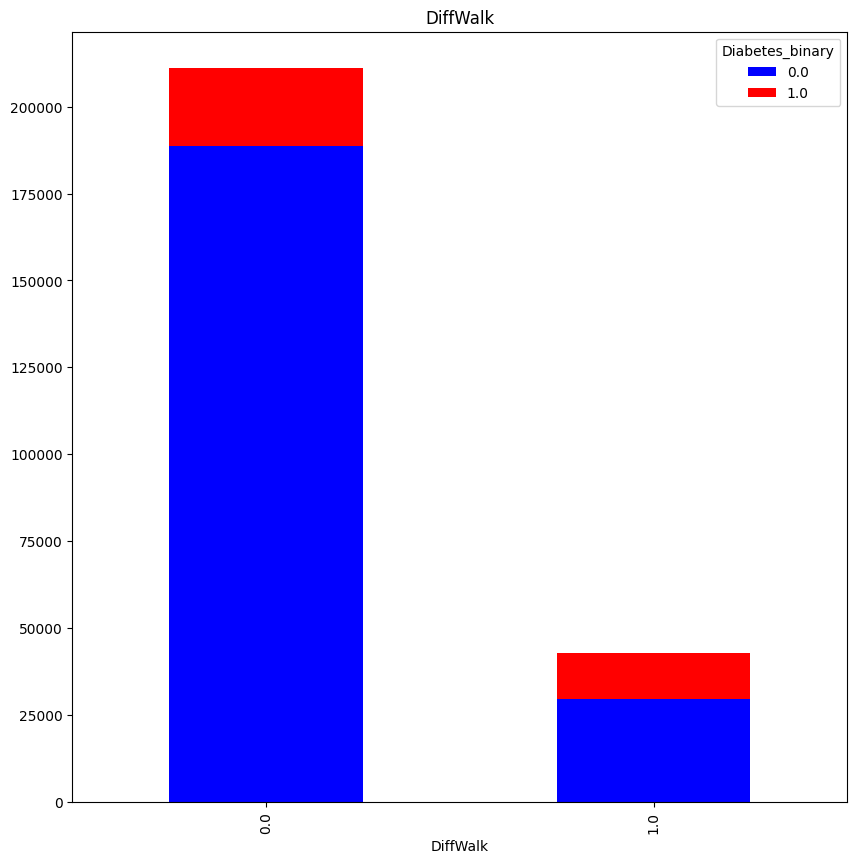

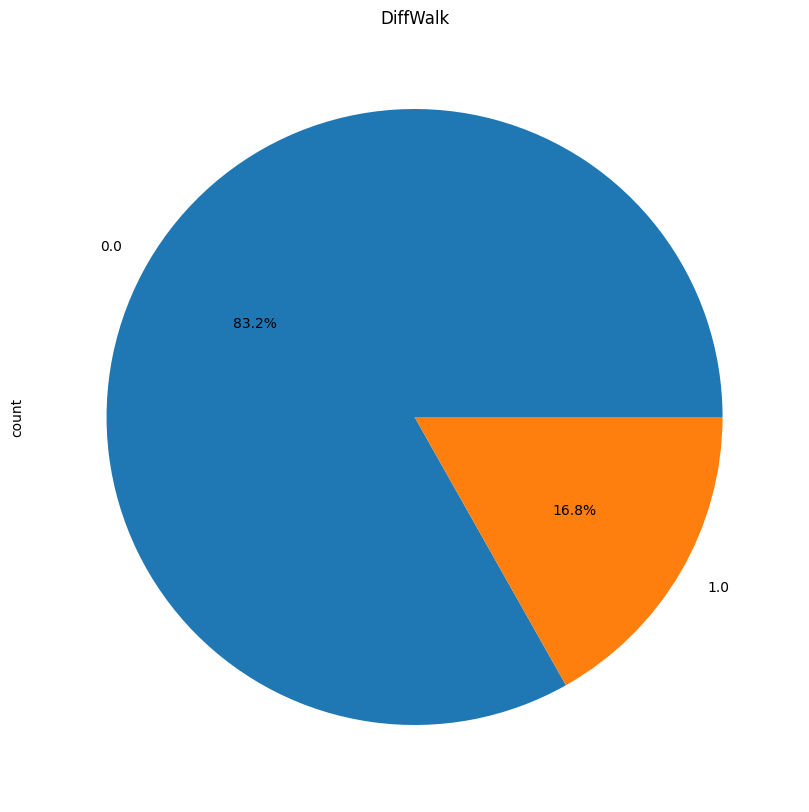

<Figure size 800x800 with 0 Axes>

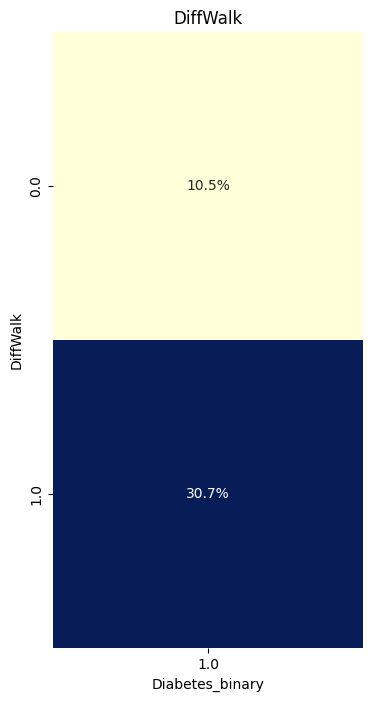

In [36]:
# plot a stacked count plot, pi chart, and a percentage heatmap for DiffWalk
create_stacked_count_plot_for_categorical_variables(diabetes_health_indicators_data, 'DiffWalk' , 'Diabetes_binary', 'DiffWalk')
create_pi_chart_for_categorical_variables(diabetes_health_indicators_data, 'DiffWalk', 'DiffWalk')
create_percentage_heatmap_for_categorical_variables(diabetes_health_indicators_data, 'DiffWalk', 'Diabetes_binary', 'DiffWalk', 0)

##### Variable 13 - Sex

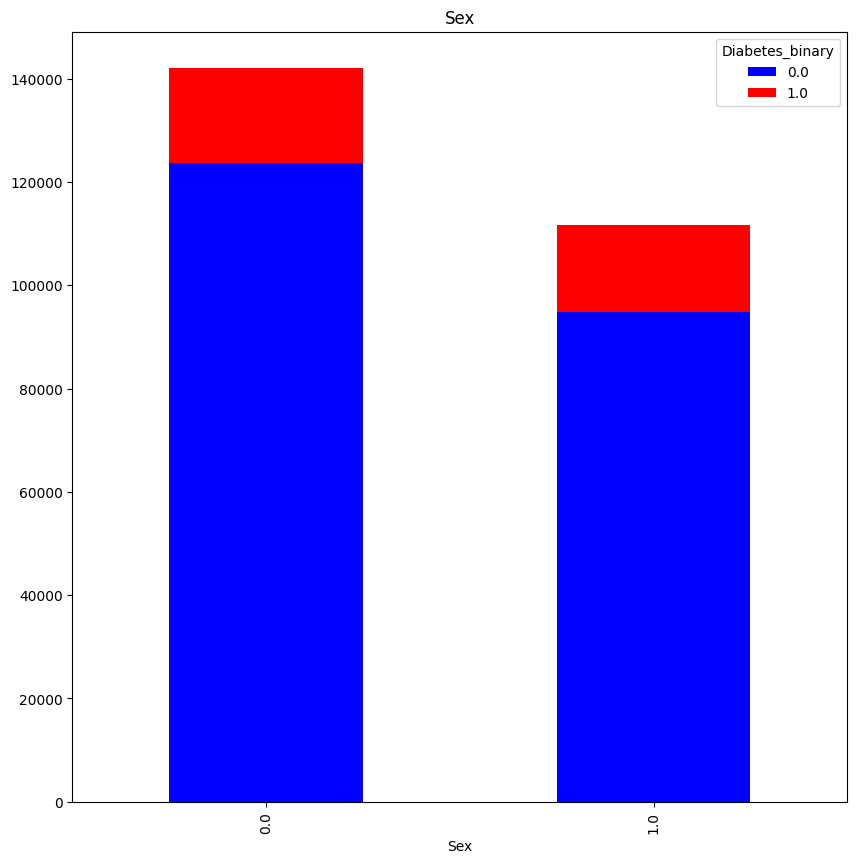

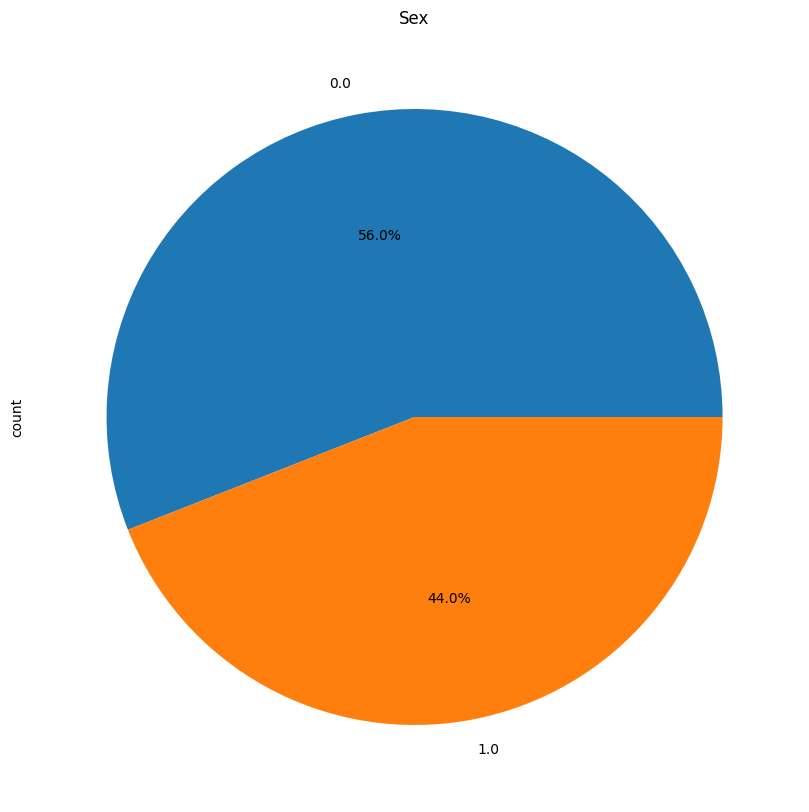

<Figure size 800x800 with 0 Axes>

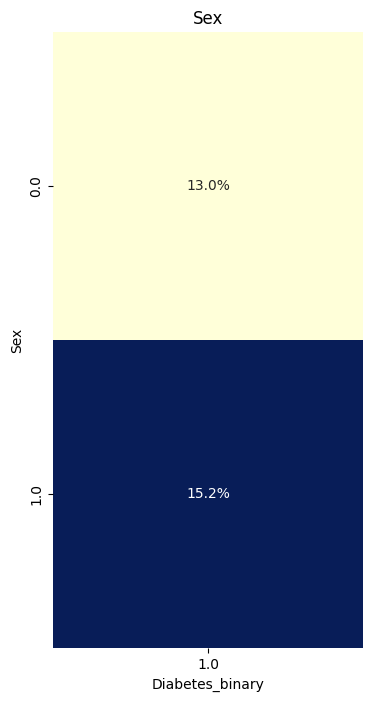

In [37]:
#  0 = female
#  1 = male

# plot a stacked count plot, pi chart, and a percentage heatmap for Sex
create_stacked_count_plot_for_categorical_variables(diabetes_health_indicators_data, 'Sex' , 'Diabetes_binary', 'Sex')
create_pi_chart_for_categorical_variables(diabetes_health_indicators_data, 'Sex', 'Sex')
create_percentage_heatmap_for_categorical_variables(diabetes_health_indicators_data, 'Sex', 'Diabetes_binary', 'Sex', 0)

##### Variable 14 - AnyHealthcare

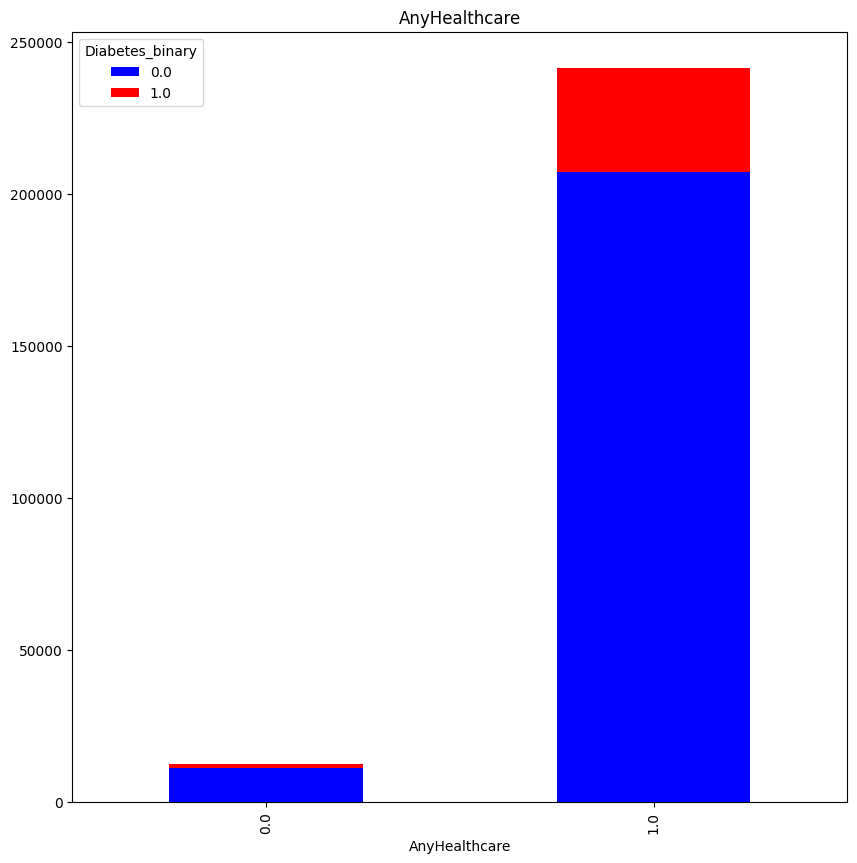

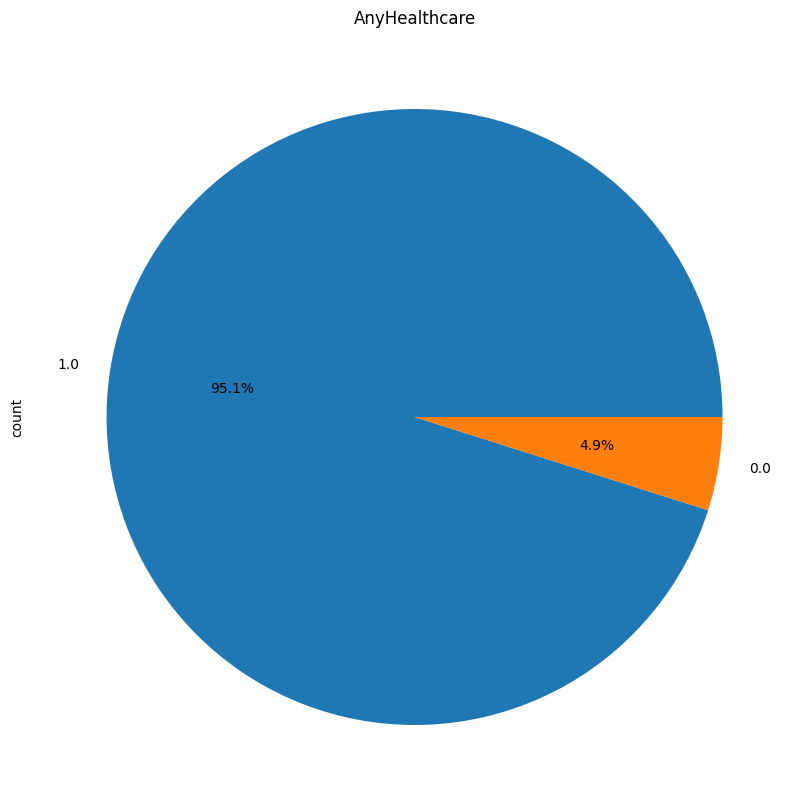

<Figure size 800x800 with 0 Axes>

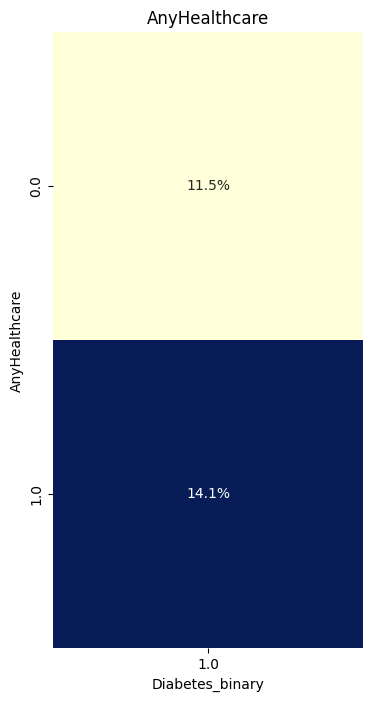

In [38]:
# plot a stacked count plot, pi chart, and a percentage heatmap for Sex
create_stacked_count_plot_for_categorical_variables(diabetes_health_indicators_data, 'AnyHealthcare' , 'Diabetes_binary', 'AnyHealthcare')
create_pi_chart_for_categorical_variables(diabetes_health_indicators_data, 'AnyHealthcare', 'AnyHealthcare')
create_percentage_heatmap_for_categorical_variables(diabetes_health_indicators_data, 'AnyHealthcare', 'Diabetes_binary', 'AnyHealthcare', 0)

#### Ordinal Categorical Variables

##### HeatMap of Categorical Variables and Binary Target Variable

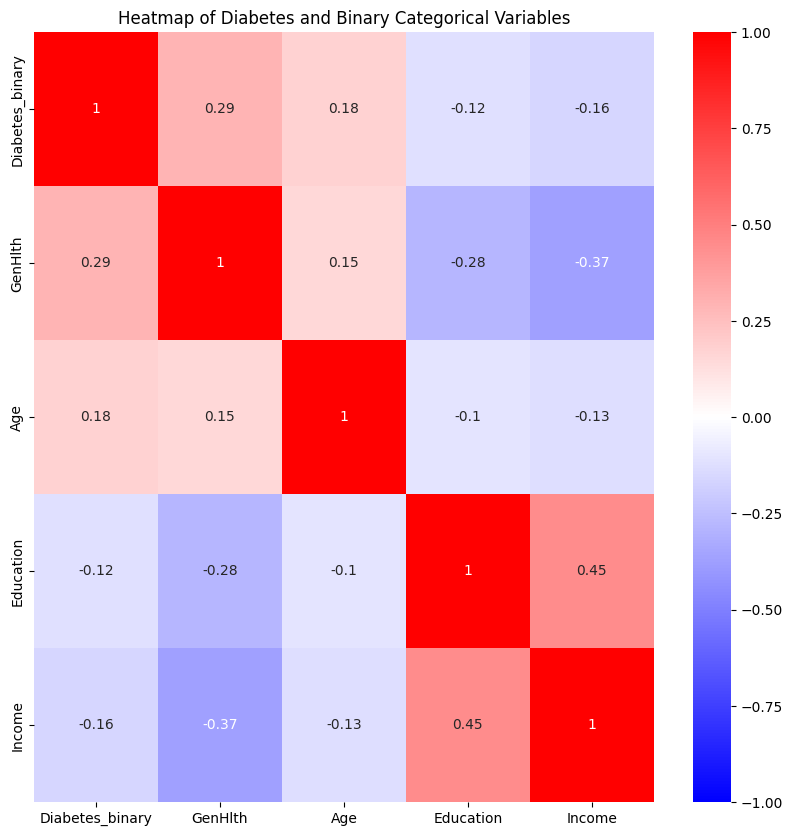

In [39]:
# add diabetic binary into numeric list
ordinal_variables_with_target_variable = ['Diabetes_binary']
for columns in diabetes_health_indicators_data_ordinal_columns:
    ordinal_variables_with_target_variable.append(columns)
    
create_heat_map(diabetes_health_indicators_data[ordinal_variables_with_target_variable],
                'Heatmap of Diabetes and Binary Categorical Variables')

##### Variable 15 - Education

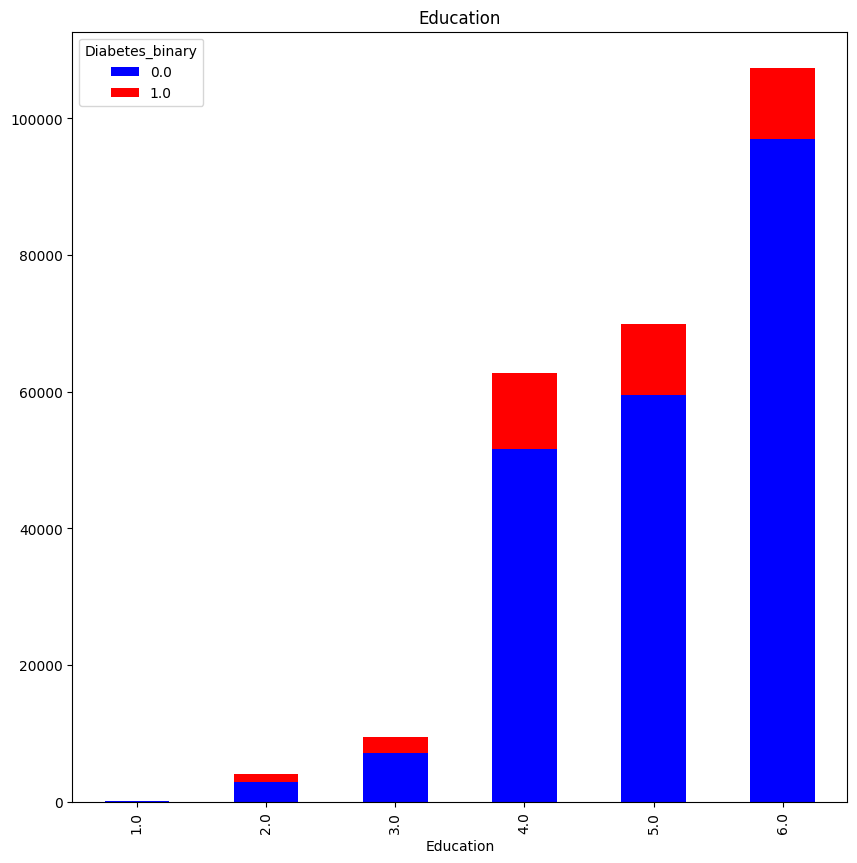

<Figure size 800x800 with 0 Axes>

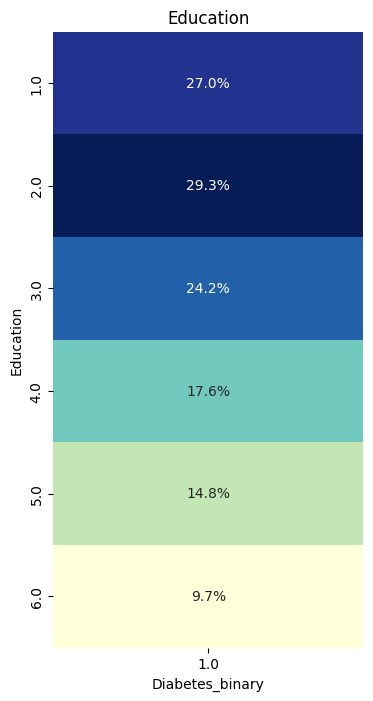

In [40]:
create_stacked_count_plot_for_categorical_variables(diabetes_health_indicators_data, 'Education' , 'Diabetes_binary', 'Education')
create_percentage_heatmap_for_categorical_variables(diabetes_health_indicators_data, 'Education', 'Diabetes_binary', 'Education', 0)

##### Variable 16 - Income

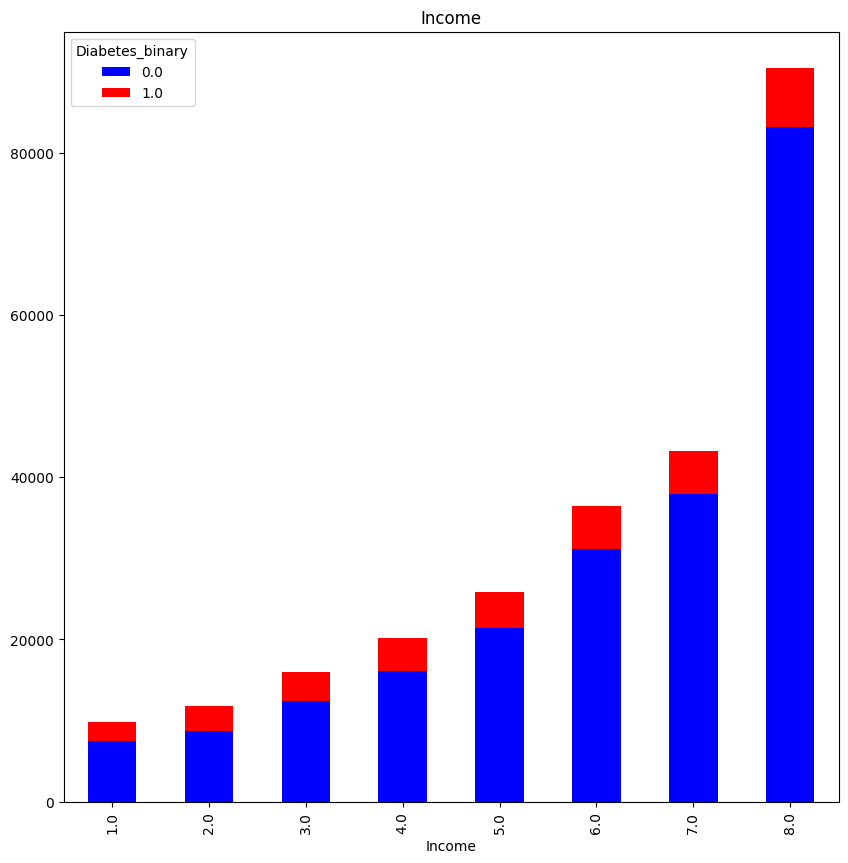

<Figure size 800x800 with 0 Axes>

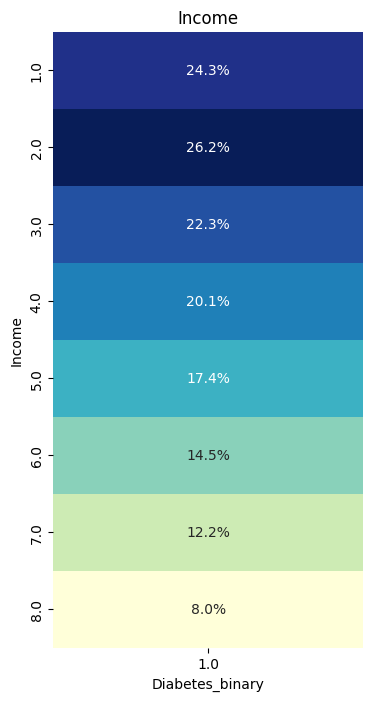

In [41]:
create_stacked_count_plot_for_categorical_variables(diabetes_health_indicators_data, 'Income' , 'Diabetes_binary', 'Income')
create_percentage_heatmap_for_categorical_variables(diabetes_health_indicators_data, 'Income', 'Diabetes_binary', 'Income', 0)

##### Variable 17 - GenHlth

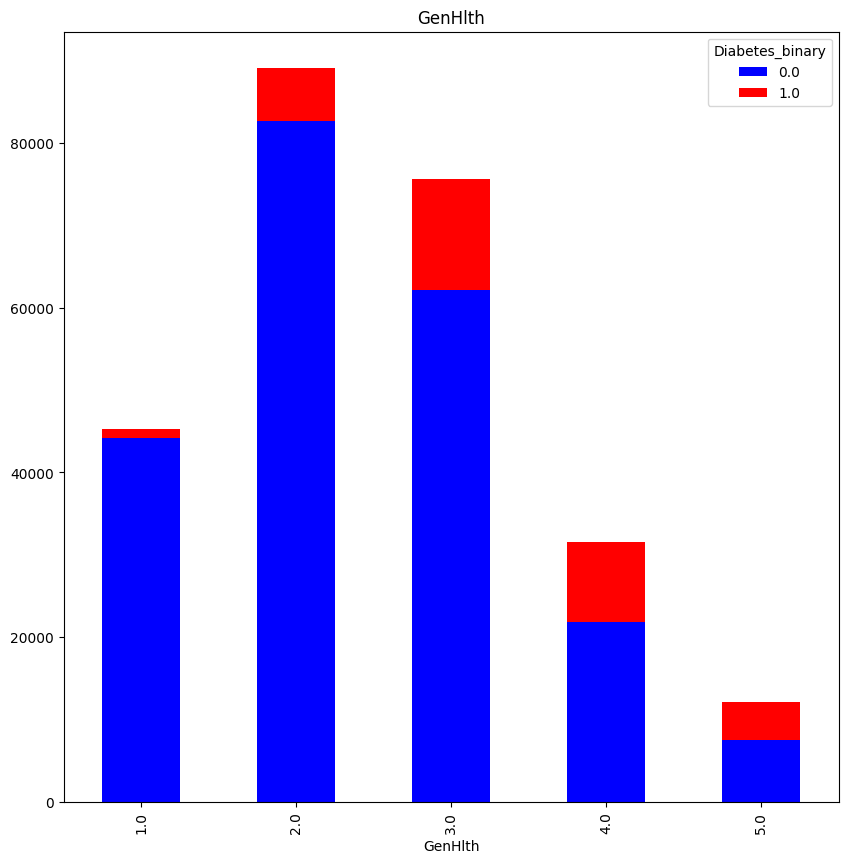

<Figure size 800x800 with 0 Axes>

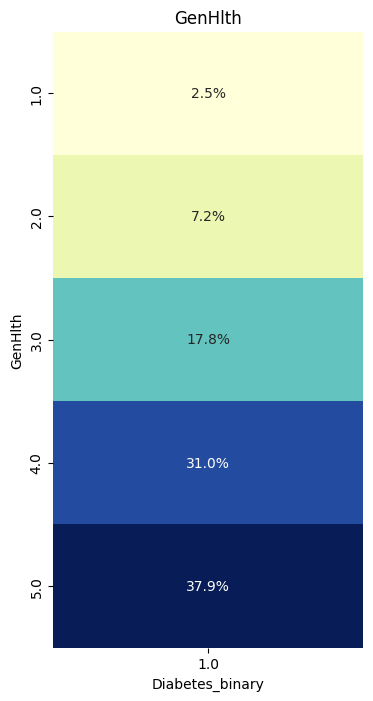

In [42]:
create_stacked_count_plot_for_categorical_variables(diabetes_health_indicators_data, 'GenHlth' , 'Diabetes_binary', 'GenHlth')
create_percentage_heatmap_for_categorical_variables(diabetes_health_indicators_data, 'GenHlth', 'Diabetes_binary', 'GenHlth',0)

##### Variable 18 - Age

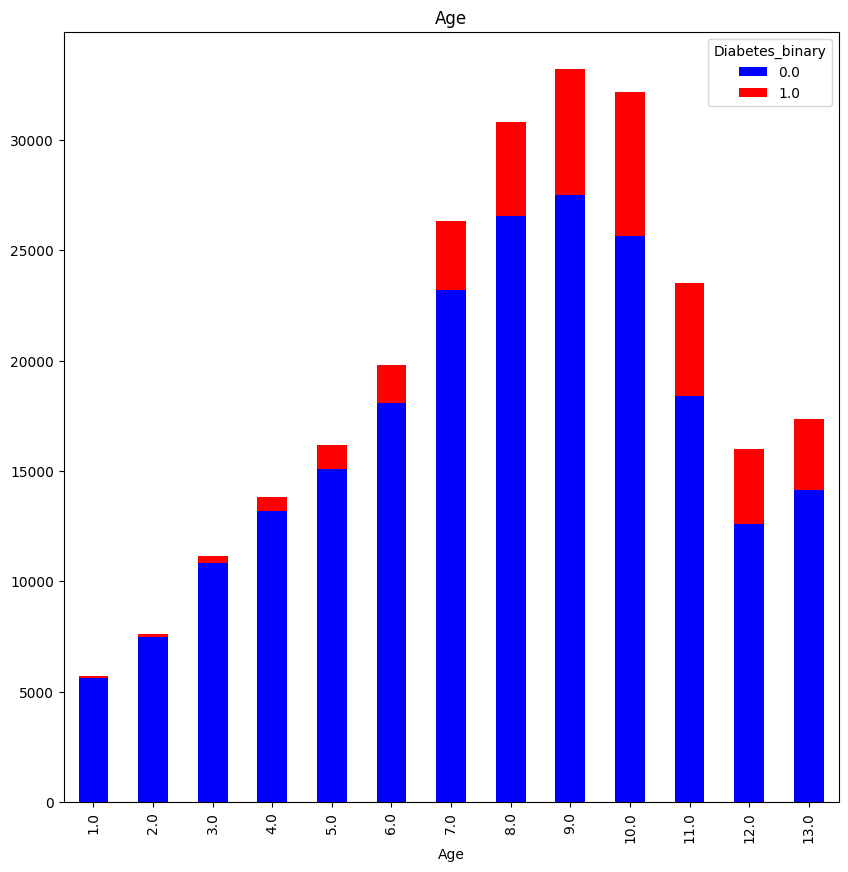

<Figure size 800x800 with 0 Axes>

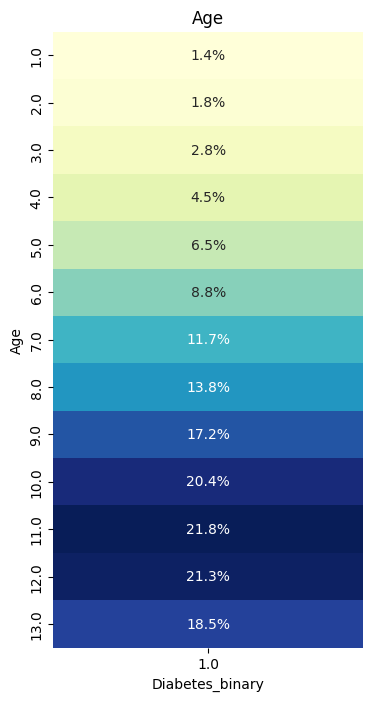

In [43]:
# 1 - 18-24
# 2 - 25-30
# 3 - 31-35
# 4 - 36-40
# 5 - 41-45
# 6 - 46-50
# 7 - 51-55
# 8 - 56-60
# 9 - 61-65
# 10 - 66-70
# 11 - 71-75
# 12 - 76-80
# 13 - 80 or older

create_stacked_count_plot_for_categorical_variables(diabetes_health_indicators_data, 'Age' , 'Diabetes_binary', 'Age')
create_percentage_heatmap_for_categorical_variables(diabetes_health_indicators_data, 'Age', 'Diabetes_binary', 'Age', 0)

### Numerical Variables

#### HeatMap of Numerical Variables and Target Variable

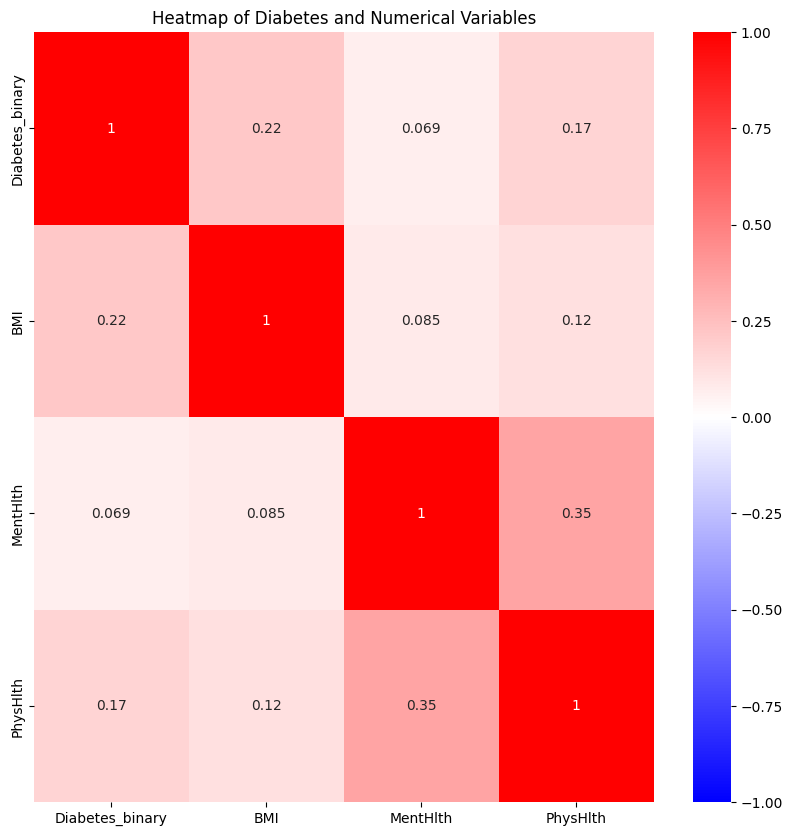

In [44]:
# add diabetic binary into numeric list
numeric_variables_with_target_variable = ['Diabetes_binary']
for columns in diabetes_health_indicators_data_numeric_columns:
    numeric_variables_with_target_variable.append(columns)

create_heat_map(diabetes_health_indicators_data[numeric_variables_with_target_variable],
                'Heatmap of Diabetes and Numerical Variables')

#### Variable 19 - BMI

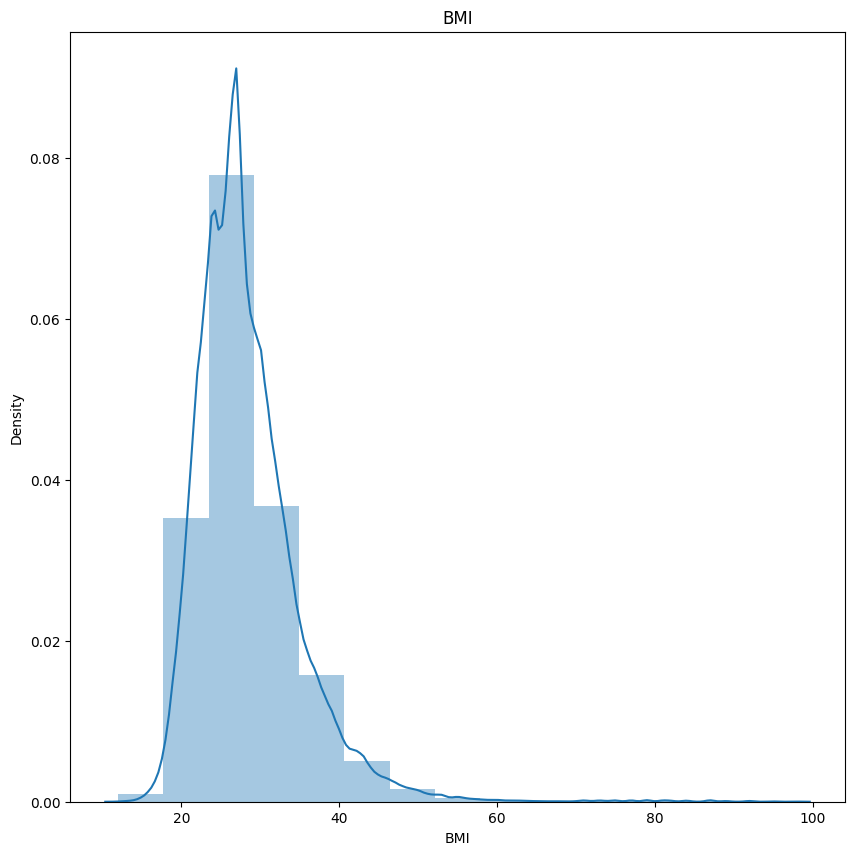

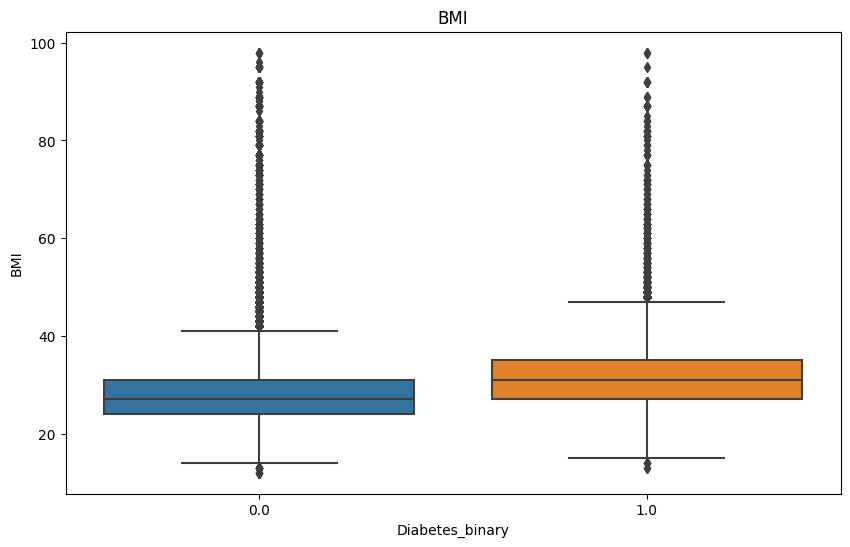

In [45]:
create_histogram(diabetes_health_indicators_data, 'BMI', 'BMI',15)
create_box_plot_for_numeric_variables(diabetes_health_indicators_data, 'Diabetes_binary', 'BMI', 'BMI')

#### Variable 20 - MentHlth

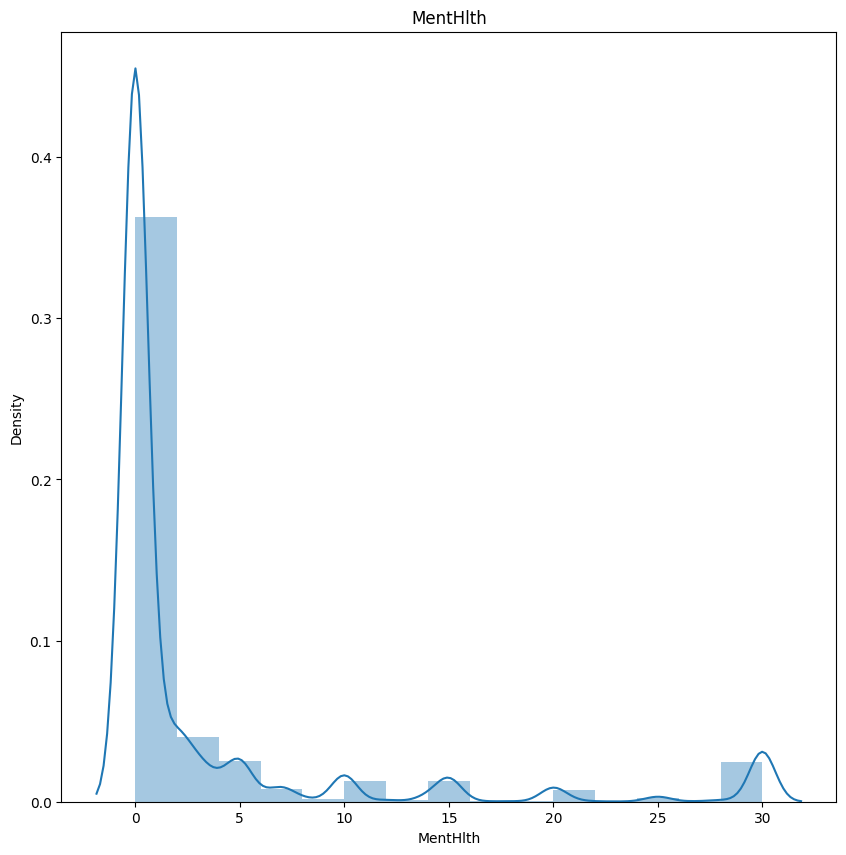

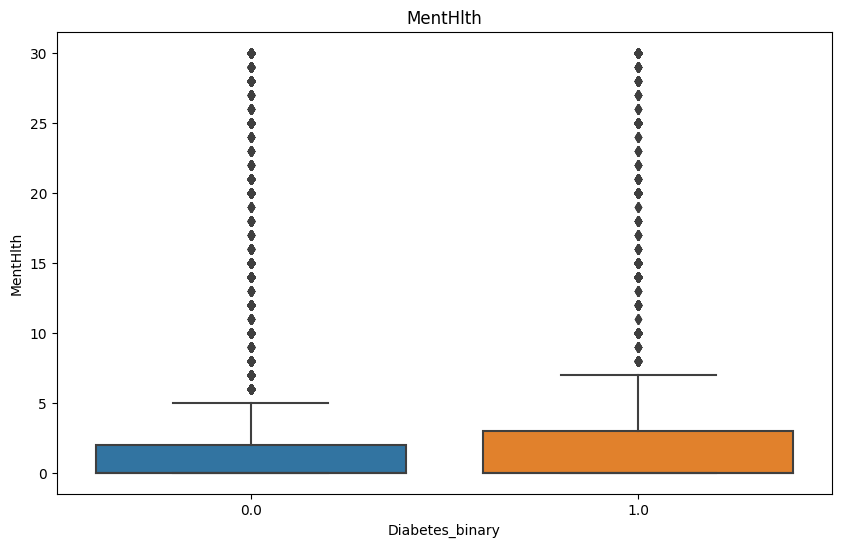

In [46]:
create_histogram(diabetes_health_indicators_data, 'MentHlth', 'MentHlth',15)
create_box_plot_for_numeric_variables(diabetes_health_indicators_data, 'Diabetes_binary', 'MentHlth', 'MentHlth')

#### Variable 21 - PhysHlth

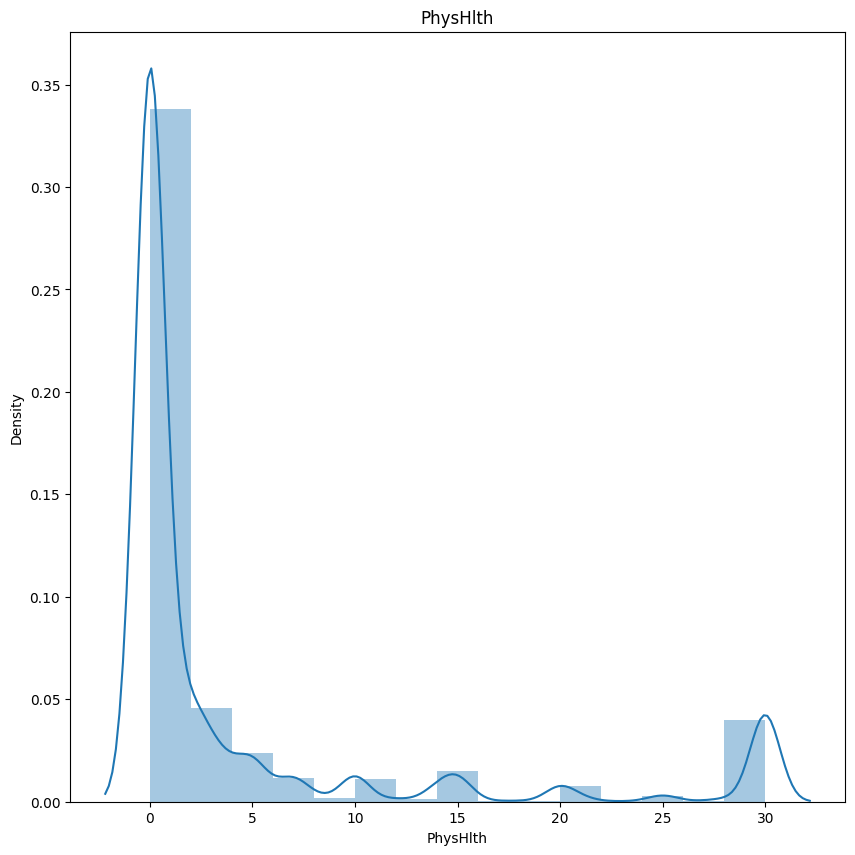

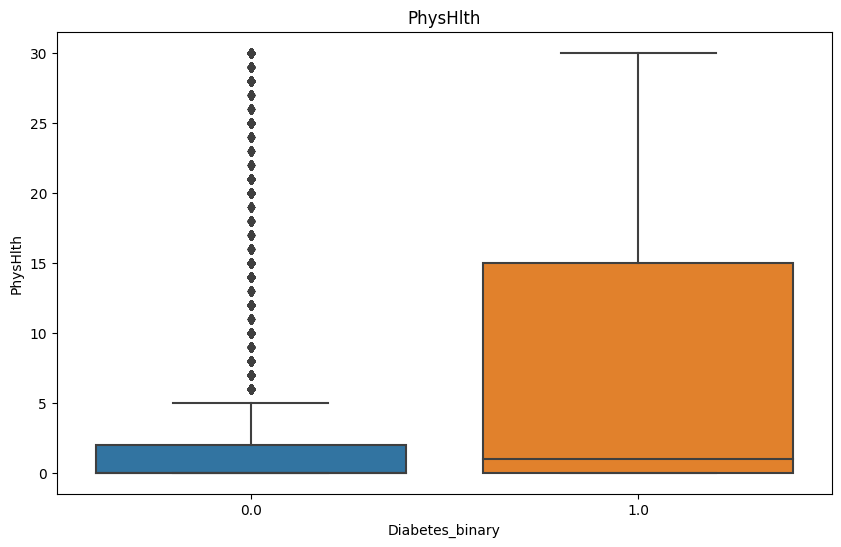

In [47]:
create_histogram(diabetes_health_indicators_data, 'PhysHlth', 'PhysHlth',15)
create_box_plot_for_numeric_variables(diabetes_health_indicators_data, 'Diabetes_binary', 'PhysHlth', 'PhysHlth')

### Correlation graph to the target variable

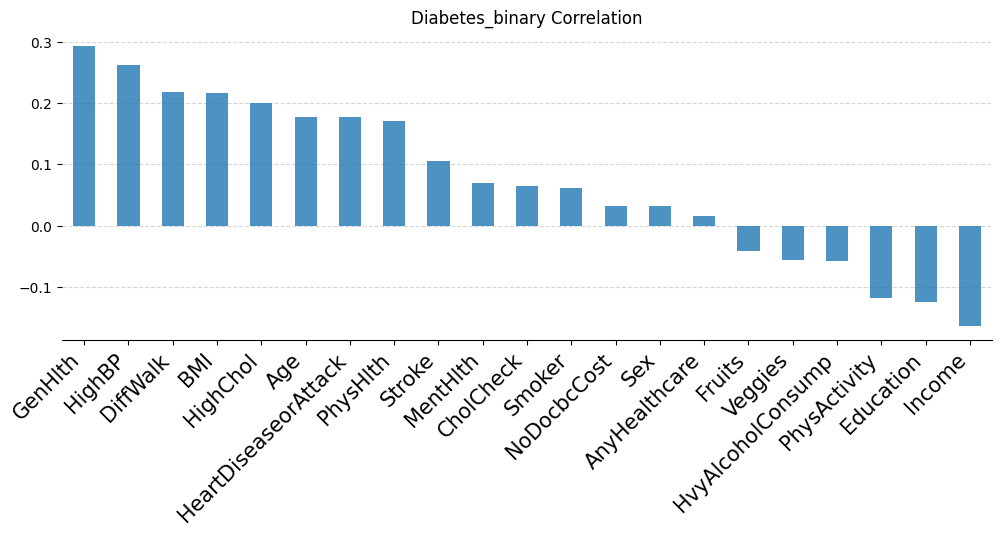

In [48]:
(diabetes_health_indicators_data.drop('Diabetes_binary', axis=1)
   .corrwith(diabetes_health_indicators_data['Diabetes_binary'])
   .sort_values(ascending=False)
   .plot(kind='bar', figsize=(12, 4), title="Diabetes_binary Correlation", alpha=0.8, zorder=3)
   .spines[['top','right', 'left']].set_visible(False)
   )
plt.grid(axis='y', linestyle='--', alpha=.5)
plt.xticks(rotation = 45, ha='right', size=15);

## Variable Importance

### Import Libraries

In [49]:
# feature significance test libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
# Kruskal-Wallis Test
from scipy.stats import kruskal

### Binary Categorical Variables - Chi-Square Test

#### Chi-Square Test Code

In [50]:
#  chi2 test on binary columns
chi2_test = SelectKBest(score_func=chi2, k='all')
chi2_test.fit(diabetes_health_indicators_data[diabetes_health_indicators_data_binary_columns].drop('Diabetes_binary', axis=1), diabetes_health_indicators_data['Diabetes_binary'])


SelectKBest(k='all', score_func=<function chi2 at 0x00000248647D75E0>)

#### Chi-Square Test Results

In [51]:
# create dataframe for chi2 test scores
chi2_test_scores = pd.DataFrame(chi2_test.scores_, columns=['chi2_score'])
chi2_test_scores['column_name'] = diabetes_health_indicators_data_binary_columns[1:]
# swap column names and chi2 scores
chi2_test_scores = chi2_test_scores[['column_name', 'chi2_score']]
chi2_test_scores = chi2_test_scores.sort_values(by='chi2_score', ascending=False).reset_index(drop=True)
print("Chi2 Test Scores")
display(chi2_test_scores)

#  create dataframe for chi2 test p-values
chi2_test_p_values = pd.DataFrame(chi2_test.pvalues_, columns=['chi2_p_value'])
chi2_test_p_values['column_name'] = diabetes_health_indicators_data_binary_columns[1:]
# swap column names and chi2 scores
chi2_test_p_values = chi2_test_p_values[['column_name', 'chi2_p_value']]
chi2_test_p_values = chi2_test_p_values.sort_values(by='chi2_p_value', ascending=True).reset_index(drop=True)
print("Chi2 Test P-Values")
display(chi2_test_p_values)

Chi2 Test Scores


,column_name,chi2_score
0,DiffWalk,10059.506391
1,HighBP,10029.013935
2,HeartDiseaseorAttack,7221.975378
3,HighChol,5859.710582
4,Stroke,2725.225194
5,PhysActivity,861.887532
6,HvyAlcoholConsump,779.424807
7,Smoker,521.978858
8,NoDocbcCost,229.542412
9,Fruits,154.291404


Chi2 Test P-Values


,column_name,chi2_p_value
0,HighBP,0.000000e+00
1,HighChol,0.000000e+00
2,Stroke,0.000000e+00
3,HeartDiseaseorAttack,0.000000e+00
4,DiffWalk,0.000000e+00
5,PhysActivity,1.893271e-189
6,HvyAlcoholConsump,1.605281e-171
7,Smoker,1.570423e-115
8,NoDocbcCost,7.501278e-52
9,Fruits,2.000073e-35


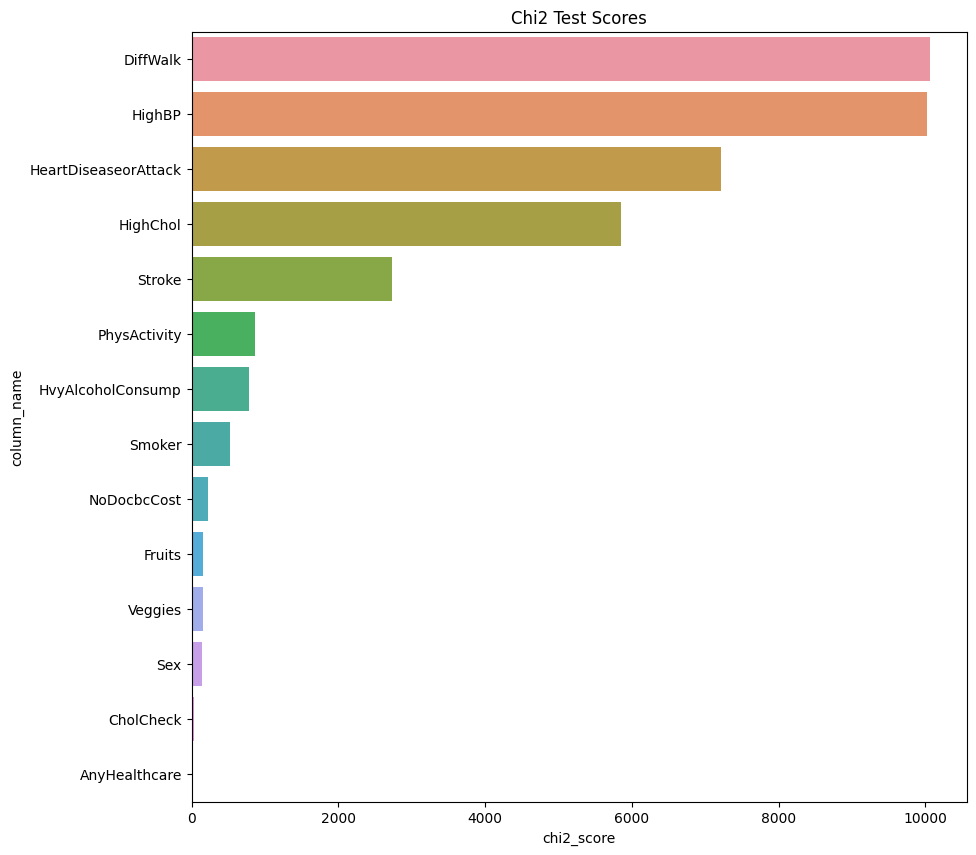

In [52]:
# plot chi2 test scores
plt.figure(figsize=(10,10))
sns.barplot(x='chi2_score', y='column_name', data=chi2_test_scores)
plt.title('Chi2 Test Scores')
plt.show()

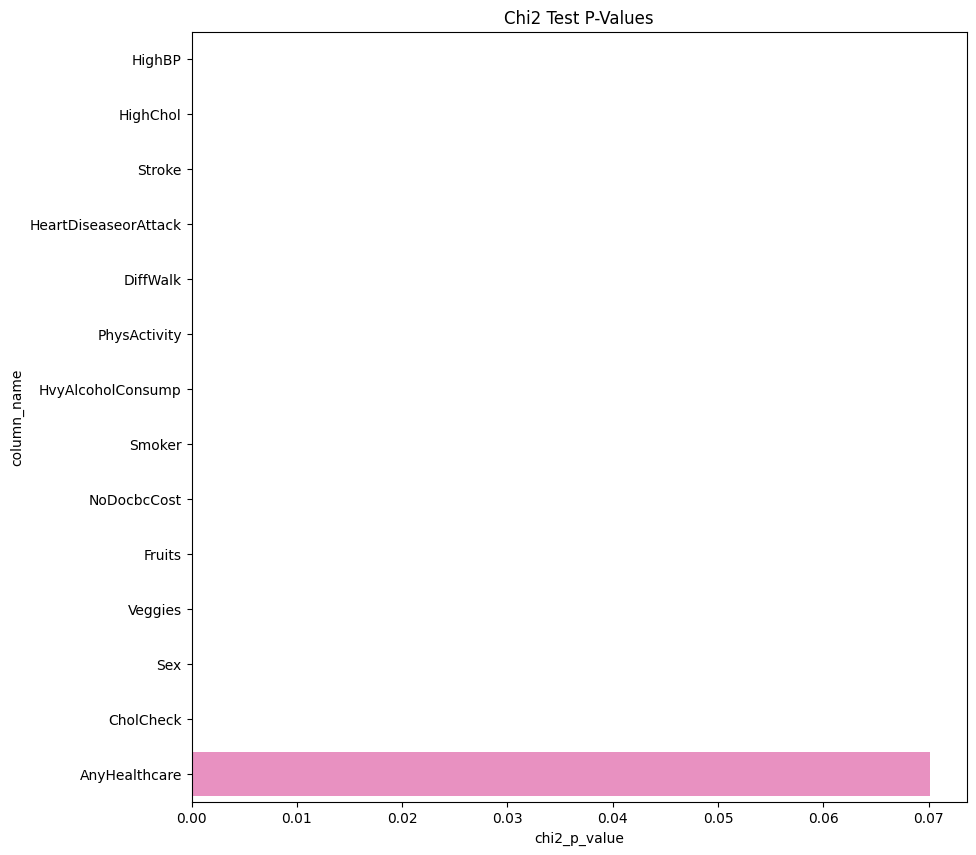

In [53]:
#  plot chi2 test p-values
plt.figure(figsize=(10,10))
sns.barplot(x='chi2_p_value', y='column_name', data=chi2_test_p_values)
plt.title('Chi2 Test P-Values')
plt.show()

#### Record Categorical Variables with Low P-Values in the Chi-Square Test

In [54]:
# record chi2 test p-values more than 0.05 into a list
chi2_test_p_values_more_than_0_05 = chi2_test_p_values[chi2_test_p_values['chi2_p_value'] > 0.05]['column_name'].to_list()
chi2_test_p_values_more_than_0_05

['AnyHealthcare']

### Ordinal Categorical Variables - Kruskal-Wallis Test

#### Kruskal-Wallis Test Code

In [55]:
# create dataframe for Kruskal-Wallis Test scores
kruskal_test_scores = pd.DataFrame(columns=['column_name', 'kruskal_score', 'kruskal_p_value'])
kruskal_test_scores['column_name'] = diabetes_health_indicators_data_ordinal_columns
for column_name in diabetes_health_indicators_data_ordinal_columns:
    ordinal_negative_data = diabetes_health_indicators_data[diabetes_health_indicators_data['Diabetes_binary'] == 0][column_name]
    ordinal_positive_data = diabetes_health_indicators_data[diabetes_health_indicators_data['Diabetes_binary'] == 1][column_name]
    kruskal_test_scores_individual =  kruskal(ordinal_negative_data,ordinal_positive_data)
    kruskal_test_scores.loc[kruskal_test_scores['column_name'] == column_name, 'kruskal_score'] = kruskal_test_scores_individual[0]
    kruskal_test_scores.loc[kruskal_test_scores['column_name'] == column_name, 'kruskal_p_value'] = kruskal_test_scores_individual[1]

#### Kruskal-Wallis Test Results

In [56]:
print("Kruskal-Wallis Test Scores")
display(kruskal_test_scores[['column_name', 'kruskal_score']])

print("Kruskal-Wallis Test P-Values")
display(kruskal_test_scores[['column_name', 'kruskal_p_value']])

Kruskal-Wallis Test Scores


,column_name,kruskal_score
0,GenHlth,20996.936084
1,Age,8009.07663
2,Education,3655.275444
3,Income,6765.218846


Kruskal-Wallis Test P-Values


,column_name,kruskal_p_value
0,GenHlth,0.0
1,Age,0.0
2,Education,0.0
3,Income,0.0


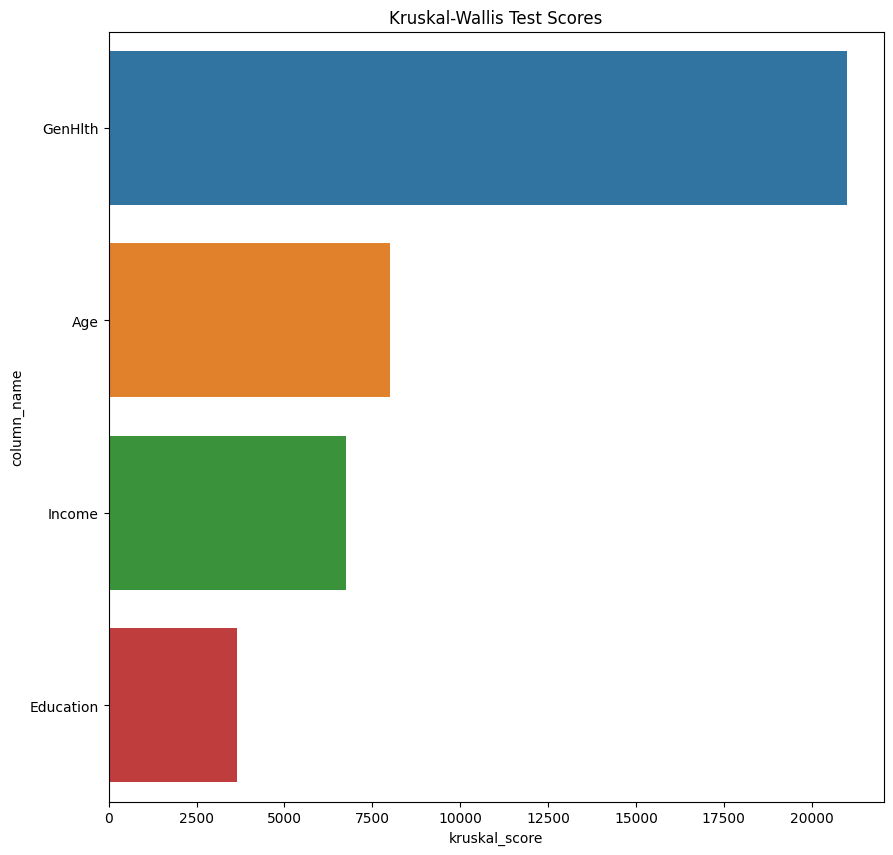

In [57]:
# plot kruskal test scores
plt.figure(figsize=(10,10))
sns.barplot(x='kruskal_score', y='column_name', data=kruskal_test_scores.sort_values(by='kruskal_score', ascending=False))
plt.title('Kruskal-Wallis Test Scores')
plt.show()

#### All Ordinal Categorical Variables are Significant p-values < 0.05
- Thus, all ordinal categorical columns are chosen for the model

### Numerical Variables - ANOVA Test

#### ANOVA Test Code

In [58]:
#  f_classif test on numerical columns
f_classif_test = SelectKBest(score_func=f_classif, k='all')
f_classif_test.fit(diabetes_health_indicators_data[diabetes_health_indicators_data_numeric_columns], diabetes_health_indicators_data['Diabetes_binary'])

SelectKBest(k='all')

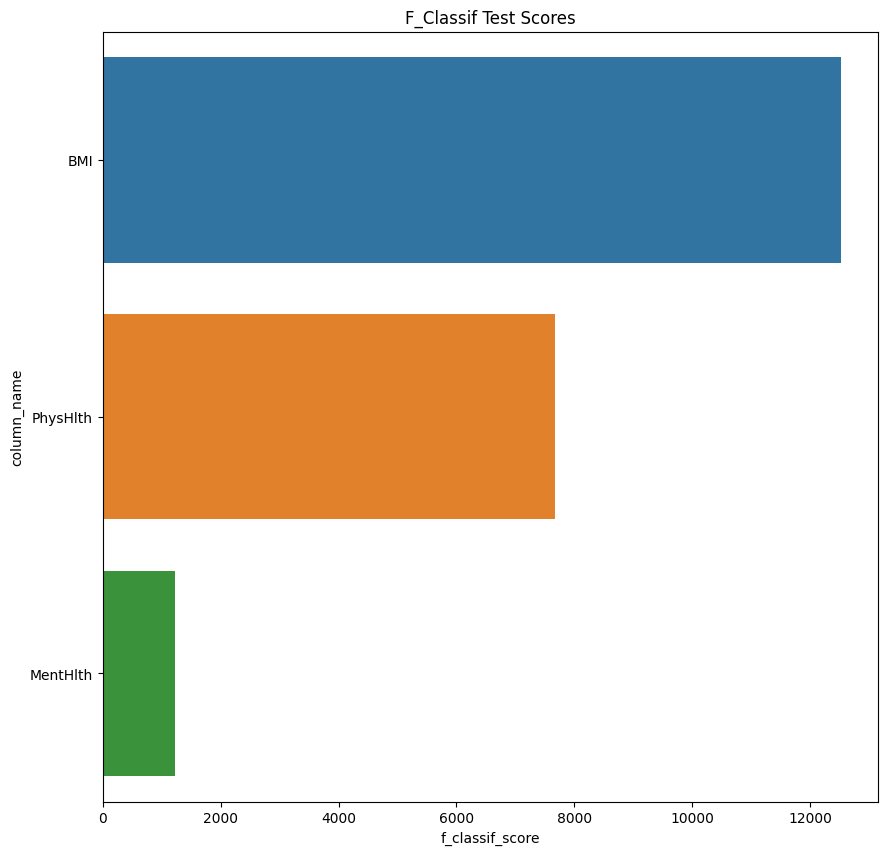

F_Classif Test P-Values


,column_name,f_classif_p_value
0,BMI,0.000000e+00
1,PhysHlth,0.000000e+00
2,MentHlth,1.143283e-267


In [59]:
#  f_classif test on numerical columns
f_classif_test = SelectKBest(score_func=f_classif, k='all')
f_classif_test.fit(diabetes_health_indicators_data[diabetes_health_indicators_data_numeric_columns], diabetes_health_indicators_data['Diabetes_binary'])

# create dataframe for f_classif test scores
f_classif_test_scores = pd.DataFrame(f_classif_test.scores_, columns=['f_classif_score'])
f_classif_test_scores['column_name'] = diabetes_health_indicators_data_numeric_columns
# swap column names and chi2 scores
f_classif_test_scores = f_classif_test_scores[['column_name', 'f_classif_score']]
f_classif_test_scores = f_classif_test_scores.sort_values(by='f_classif_score', ascending=False).reset_index(drop=True)
# plot f_classif test scores
plt.figure(figsize=(10,10))
sns.barplot(x='f_classif_score', y='column_name', data=f_classif_test_scores)
plt.title('F_Classif Test Scores')
plt.show()

#  create dataframe for f_classif test p-values
f_classif_test_p_values = pd.DataFrame(f_classif_test.pvalues_, columns=['f_classif_p_value'])
f_classif_test_p_values['column_name'] = diabetes_health_indicators_data_numeric_columns
# swap column names and chi2 scores
f_classif_test_p_values = f_classif_test_p_values[['column_name', 'f_classif_p_value']]
f_classif_test_p_values = f_classif_test_p_values.sort_values(by='f_classif_p_value', ascending=True).reset_index(drop=True)
print("F_Classif Test P-Values")
display(f_classif_test_p_values)

#### ANOVA Test Results

In [60]:
# create dataframe for f_classif test scores
f_classif_test_scores = pd.DataFrame(f_classif_test.scores_, columns=['f_classif_score'])
f_classif_test_scores['column_name'] = diabetes_health_indicators_data_numeric_columns
# swap column names and chi2 scores
f_classif_test_scores = f_classif_test_scores[['column_name', 'f_classif_score']]
f_classif_test_scores = f_classif_test_scores.sort_values(by='f_classif_score', ascending=False).reset_index(drop=True)
print("F_Classif Test Scores")
display(f_classif_test_scores)

#  create dataframe for f_classif test p-values
f_classif_test_p_values = pd.DataFrame(f_classif_test.pvalues_, columns=['f_classif_p_value'])
f_classif_test_p_values['column_name'] = diabetes_health_indicators_data_numeric_columns
# swap column names and chi2 scores
f_classif_test_p_values = f_classif_test_p_values[['column_name', 'f_classif_p_value']]
f_classif_test_p_values = f_classif_test_p_values.sort_values(by='f_classif_p_value', ascending=True).reset_index(drop=True)
print("F_Classif Test P-Values")
display(f_classif_test_p_values)

F_Classif Test Scores


,column_name,f_classif_score
0,BMI,12516.718642
1,PhysHlth,7672.267690
2,MentHlth,1224.700591


F_Classif Test P-Values


,column_name,f_classif_p_value
0,BMI,0.000000e+00
1,PhysHlth,0.000000e+00
2,MentHlth,1.143283e-267


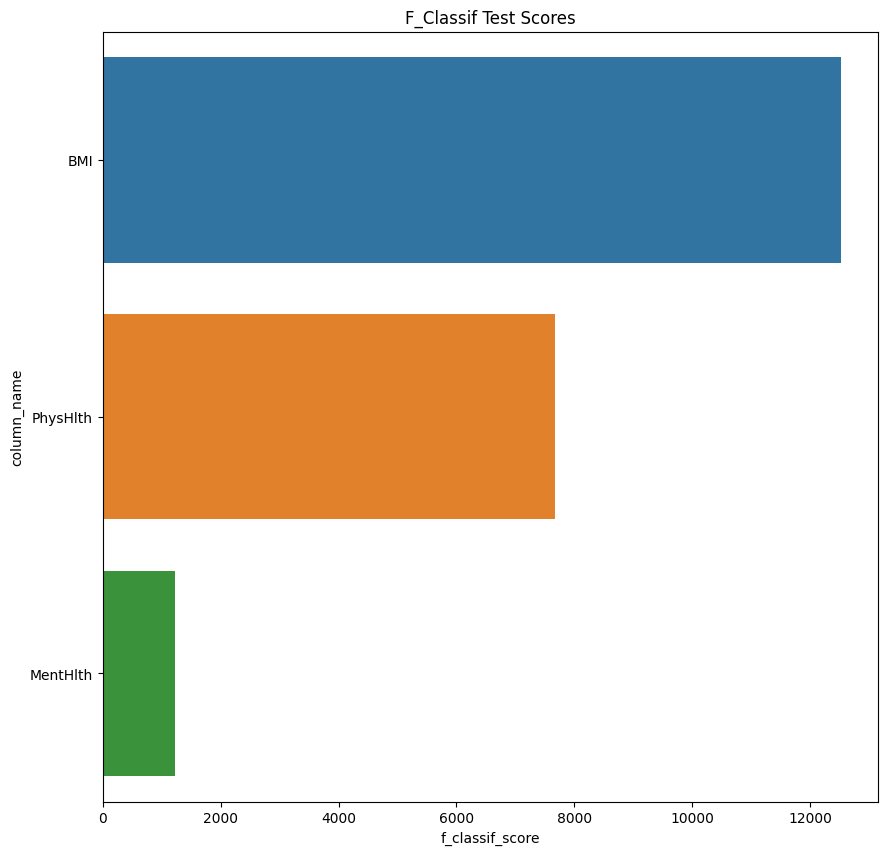

In [61]:
# plot f_classif test scores
plt.figure(figsize=(10,10))
sns.barplot(x='f_classif_score', y='column_name', data=f_classif_test_scores)
plt.title('F_Classif Test Scores')
plt.show()

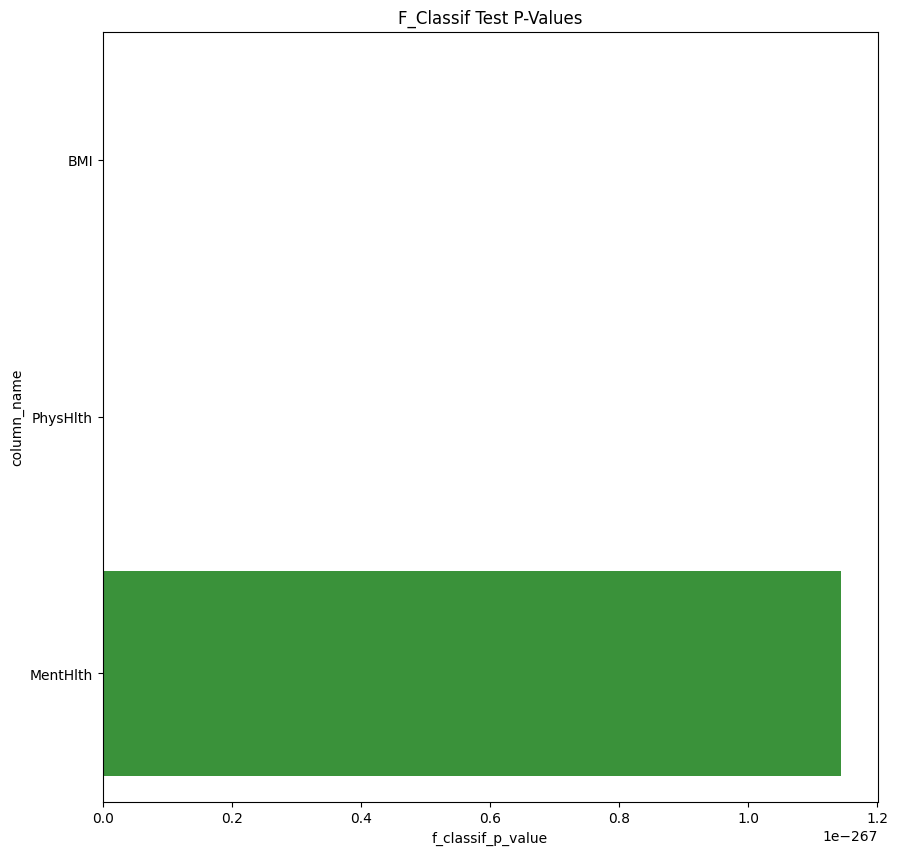

In [62]:
#  plot f_classif test p-values
plt.figure(figsize=(10,10))
sns.barplot(x='f_classif_p_value', y='column_name', data=f_classif_test_p_values)
plt.title('F_Classif Test P-Values')
plt.show()

#### All Nemerical Variables are Significant p-values < 0.05
- Thus, all numeric columns are chosen for the model

# Data Preprocessing

### Filter Data out insignificant columns (Feature Selection)

In [63]:
#  drop columns that are not significant
diabetes_health_indicators_data_after_feature_selection = diabetes_health_indicators_data.drop(chi2_test_p_values_more_than_0_05, axis=1)
diabetes_health_indicators_data_after_feature_selection.shape

(253680, 21)

## More?????
-  Honestly the data is already fine as it is, so I don't think there is much to do here
- force content in?
- e.g. try to bin categorical variables, check their p-valuees and see if it is better than the original????? (feature engineering)
- might be bloated for documentation if this is done ;-;

### Split Data into Training and Testing Sets

In [64]:
#  note:  extra thing that can be done is to check weather no sampling, under sampling, over sampling 
# is better for the model performance

In [65]:
# import train test split
from sklearn.model_selection import train_test_split
# Define X and y
X = diabetes_health_indicators_data_after_feature_selection.drop('Diabetes_binary', axis=1)
y = diabetes_health_indicators_data_after_feature_selection['Diabetes_binary']
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

### Resolve class imbalance issues 

In [66]:
print('Before Sampling')
print(y_train.value_counts())

Before Sampling
Diabetes_binary
0.0    174595
1.0     28349
Name: count, dtype: int64


#### Method 1: Oversampling

In [67]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [68]:
print('Before ros')
print(y_train.value_counts())
print('\n')
print('After ros')
print(y_train_ros.value_counts())

Before ros
Diabetes_binary
0.0    174595
1.0     28349
Name: count, dtype: int64


After ros
Diabetes_binary
0.0    174595
1.0    174595
Name: count, dtype: int64


#### Method 2: Undersampling

In [69]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [70]:
print('Before rus')
print(y_train.value_counts())
print('\n')
print('After rus')
print(y_train_rus.value_counts())

Before rus
Diabetes_binary
0.0    174595
1.0     28349
Name: count, dtype: int64


After rus
Diabetes_binary
0.0    28349
1.0    28349
Name: count, dtype: int64


#### Method 3: SMOTE

In [71]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
smote = SMOTE(sampling_strategy = 'auto' , random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [72]:
print('Before SMOTE')
print(y_train.value_counts())
print('\n')
print('After SMOTE')
print(y_train_smote.value_counts())

Before SMOTE
Diabetes_binary
0.0    174595
1.0     28349
Name: count, dtype: int64


After SMOTE
Diabetes_binary
0.0    174595
1.0    174595
Name: count, dtype: int64


# Model Development and Hyperparameter Tuning

## Import General Libraries

In [73]:
# import evaluation metrics
from sklearn.metrics import recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
# import hyperparameter tuning 
from sklearn.model_selection import GridSearchCV
scoring = ['recall', 'f1', 'roc_auc']

## Model 1 - Logistic Regression

## Model 2 - Decision Tree

## Model 3 - Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#### Random Forest Model Parameters

In [75]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
rf_param_grid = {
    'n_estimators': [10, 50, 100], # Number of trees in the forest
    'criterion': ['gini', 'entropy'], # Splitting criterion
    'max_depth': [None, 10, 20], # Maximum depth of the tree
    'min_samples_split': [2, 5], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2], # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None] # Number of features to consider when looking for the best split
}

#### Random Forest Model Without Sampling

In [76]:
# Perform grid search with cross-validation to find the best hyperparameters
rf_grid_search = GridSearchCV(estimator=rf_classifier
                              , param_grid=rf_param_grid
                              , cv=5, scoring = scoring
                              , refit = 'recall'
                              , n_jobs = -1
                              , verbose=1)
rf_grid_search.fit(X_train, y_train)

print("Best Parameters: ", rf_grid_search.best_params_)
print("Best Score (Recall): ", rf_grid_search.best_score_)
print("Best F1-score: ", rf_grid_search.cv_results_['mean_test_f1'][rf_grid_search.best_index_])
print("Best ROC AUC: ", rf_grid_search.cv_results_['mean_test_roc_auc'][rf_grid_search.best_index_])

best_rf_classifier = rf_grid_search.best_estimator_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


## Model 4 - Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

#### Bagging Model Parameters

In [ ]:
# Create a base classifier
bagging_base_classifier = DecisionTreeClassifier()
# Create a BaggingClassifier
bagging_classifier = BaggingClassifier(bagging_base_classifier, random_state=42)

# hyperparameter tuning dictionary for bagging classifier
bagging_param_grid = {
    'base_estimator__max_depth': [3, 5, 7], # Maximum depth of the decision tree in the BaggingClassifier
    'n_estimators': [50, 100, 150], # Number of base classifiers in the ensemble
    'max_samples': [0.5, 0.75, 1.0], # Proportion of samples to draw from X to train each base classifier
    'max_features': [0.5, 0.75, 1.0], # Proportion of features to draw from X to train each base classifier
    'bootstrap': [True, False]  # Whether to sample with replacement or not
}

#### Bagging Model without Sampling

In [ ]:
base_bagging_grid_search = GridSearchCV(bagging_classifier
                                        , bagging_param_grid
                                        , cv = 5, scoring = scoring
                                        , refit = 'recall'
                                        , return_train_score = True
                                        , n_jobs = -1 # Warning! This will use all available CPU cores
                                        , verbose = 1)

base_bagging_grid_search.fit(X_train, y_train)

print("Best Parameters: ", base_bagging_grid_search.best_params_)
print("Best Score (Recall): ", base_bagging_grid_search.best_score_)
print("Best F1-score: ", base_bagging_grid_search.cv_results_['mean_test_f1'][base_bagging_grid_search.best_index_])
print("Best ROC AUC: ", base_bagging_grid_search.cv_results_['mean_test_roc_auc'][base_bagging_grid_search.best_index_])

base_best_bagging_classifier = base_bagging_grid_search.best_estimator_

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters:  {'base_estimator__max_depth': 5, 'bootstrap': False, 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 50}
Best Score (Recall):  0.12984598623100413
Best F1-score:  0.21092913030637678
Best ROC AUC:  0.8122877036772355


In [ ]:
base_y_pred = base_best_bagging_classifier.predict(X_test)

recall = recall_score(y_test, base_y_pred)
f1 = f1_score(y_test, base_y_pred)
roc_auc = roc_auc_score(y_test, base_y_pred)
print("Recall: ", recall)
print("F1: ", f1)
print("ROC AUC: ", roc_auc)

Recall:  0.12648277833357152
F1:  0.20711443950386146
ROC AUC:  0.5556509092746986


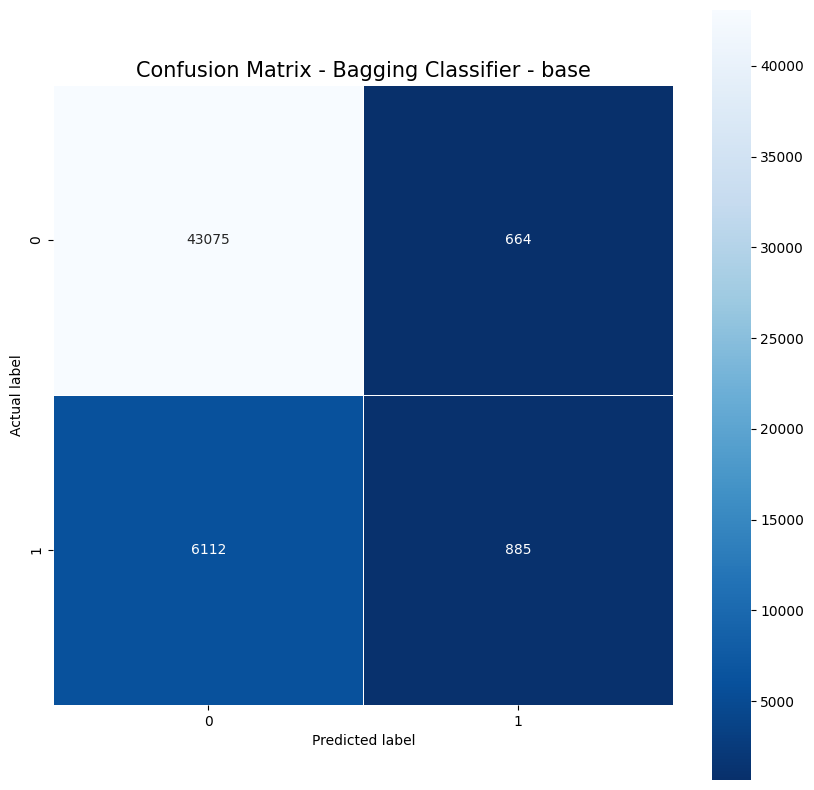

In [ ]:
plot_confusion_matrix(y_test, base_y_pred, 'Confusion Matrix - Bagging Classifier - base')

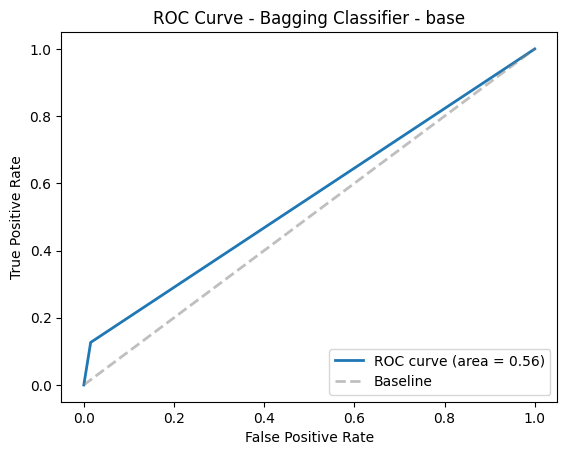

In [ ]:
plot_roc_curve(y_test, base_y_pred, 'ROC Curve - Bagging Classifier - base')

#### Bagging Model with Oversampling

In [ ]:
ros_bagging_grid_search = GridSearchCV(bagging_classifier
                                        , bagging_param_grid
                                        , cv = 5, scoring = scoring
                                        , refit = 'recall'
                                        , return_train_score = True
                                        , n_jobs = -1 # Warning! This will use all available CPU cores
                                        , verbose = 1)

ros_bagging_grid_search.fit(X_train_ros, y_train_ros)

print("Best Parameters: ", ros_bagging_grid_search.best_params_)
print("Best Score (Recall): ", ros_bagging_grid_search.best_score_)
print("Best F1-score: ", ros_bagging_grid_search.cv_results_['mean_test_f1'][ros_bagging_grid_search.best_index_])
print("Best ROC AUC: ", ros_bagging_grid_search.cv_results_['mean_test_roc_auc'][ros_bagging_grid_search.best_index_])

ros_best_bagging_classifier = ros_bagging_grid_search.best_estimator_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters:  {'max_features': 0.9, 'max_samples': 0.9, 'n_estimators': 30}
Best Score (Recall):  0.9931956814341761
Best F1-score:  0.9488379790708669
Best ROC AUC:  0.9960232562074385


In [ ]:
ros_y_pred = ros_best_bagging_classifier.predict(X_test)

recall = recall_score(y_test, ros_y_pred)
f1 = f1_score(y_test, ros_y_pred)
roc_auc = roc_auc_score(y_test, ros_y_pred)
print("Recall: ", recall)
print("F1: ", f1)
print("ROC AUC: ", roc_auc)

Recall:  0.30613119908532227
F1:  0.34143619988841956
ROC AUC:  0.6141072328676114


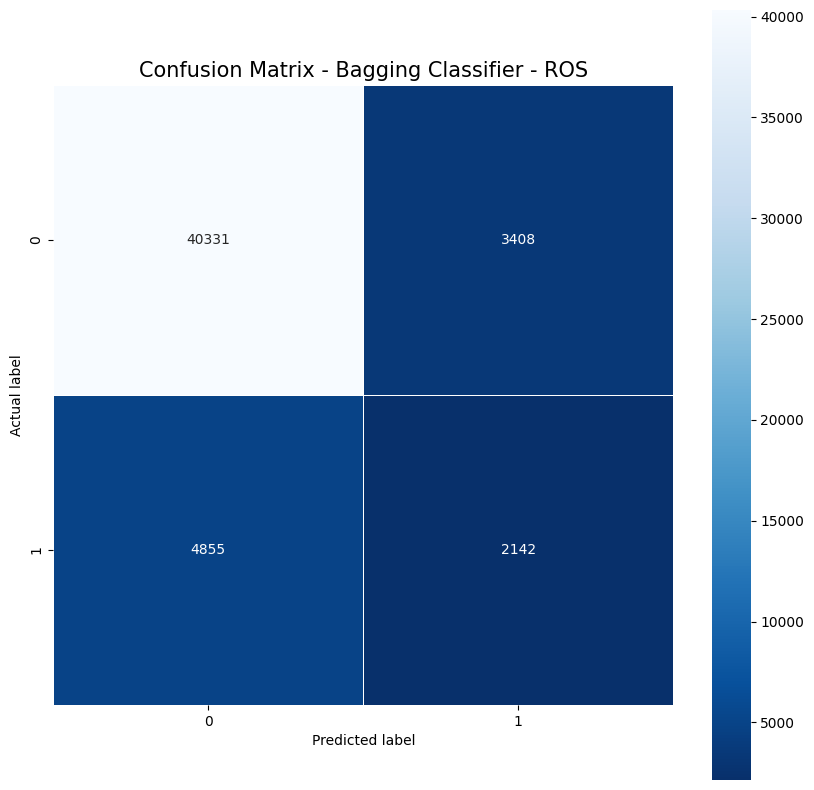

In [ ]:
plot_confusion_matrix(y_test, ros_y_pred, 'Confusion Matrix - Bagging Classifier - ROS')

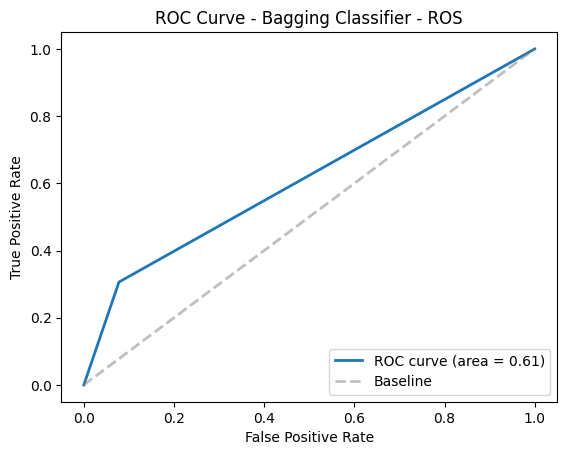

In [ ]:
plot_roc_curve(y_test, ros_y_pred, 'ROC Curve - Bagging Classifier - ROS')

#### Bagging Model with Undersampling

In [ ]:
rus_bagging_grid_search = GridSearchCV(bagging_classifier
                                        , bagging_param_grid
                                        , cv = 5, scoring = scoring
                                        , refit = 'recall'
                                        , return_train_score = True
                                        , n_jobs = -1 # Warning! This will use all available CPU cores
                                        , verbose = 1)

rus_bagging_grid_search.fit(X_train_rus, y_train_rus)

print("Best Parameters: ", rus_bagging_grid_search.best_params_)
print("Best Score (Recall): ", rus_bagging_grid_search.best_score_)
print("Best F1-score: ", rus_bagging_grid_search.cv_results_['mean_test_f1'][rus_bagging_grid_search.best_index_])
print("Best ROC AUC: ", rus_bagging_grid_search.cv_results_['mean_test_roc_auc'][rus_bagging_grid_search.best_index_])

rus_best_bagging_classifier = rus_bagging_grid_search.best_estimator_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters:  {'max_features': 0.5, 'max_samples': 0.7, 'n_estimators': 30}
Best Score (Recall):  0.7678579719586364
Best F1-score:  0.7468103092344685
Best ROC AUC:  0.812266345539747


In [ ]:
rus_y_pred = rus_best_bagging_classifier.predict(X_test)

recall = recall_score(y_test, rus_y_pred)
f1 = f1_score(y_test, rus_y_pred)
roc_auc = roc_auc_score(y_test, rus_y_pred)
print("Recall: ", recall)
print("F1: ", f1)
print("ROC AUC: ", roc_auc)

Recall:  0.7804773474346148
F1:  0.43465456860872337
ROC AUC:  0.7454022577041384


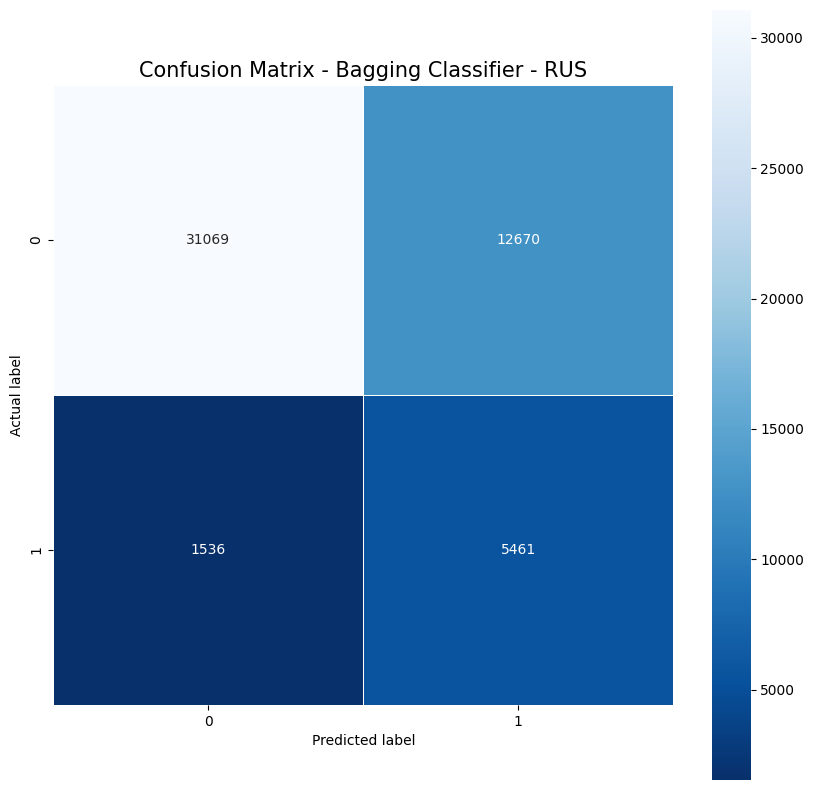

In [ ]:
plot_confusion_matrix(y_test, rus_y_pred, 'Confusion Matrix - Bagging Classifier - RUS')

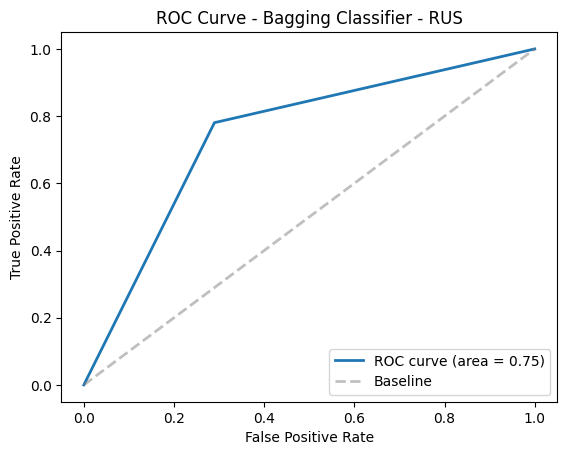

In [ ]:
plot_roc_curve(y_test, rus_y_pred, 'ROC Curve - Bagging Classifier - RUS')

#### Bagging Model with SMOTE

In [ ]:
smote_bagging_grid_search = GridSearchCV(bagging_classifier
                                        , bagging_param_grid
                                        , cv = 5
                                        , scoring = scoring
                                        , refit = 'recall'
                                        , return_train_score = True
                                        , n_jobs = -1 # Warning! This will use all available CPU cores
                                        , verbose = 1)

smote_bagging_grid_search.fit(X_train_smote, y_train_smote)

print("Best Parameters: ", smote_bagging_grid_search.best_params_)
print("Best Score (Recall): ", smote_bagging_grid_search.best_score_)
print("Best F1-score: ", smote_bagging_grid_search.cv_results_['mean_test_f1'][smote_bagging_grid_search.best_index_])
print("Best ROC AUC: ", smote_bagging_grid_search.cv_results_['mean_test_roc_auc'][smote_bagging_grid_search.best_index_])

smote_best_bagging_classifier = smote_bagging_grid_search.best_estimator_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters:  {'max_features': 0.9, 'max_samples': 0.9, 'n_estimators': 20}
Best Score (Recall):  0.8418339585898794
Best F1-score:  0.8488205961427002
Best ROC AUC:  0.9662682533145169


In [ ]:
smote_y_pred = smote_best_bagging_classifier.predict(X_test)

recall = recall_score(y_test, smote_y_pred)
f1 = f1_score(y_test, smote_y_pred)
roc_auc = roc_auc_score(y_test, smote_y_pred)
print("Recall: ", recall)
print("F1: ", f1)
print("ROC AUC: ", roc_auc)

Recall:  0.2012290981849364
F1:  0.27470490683835724
ROC AUC:  0.5795121004768162


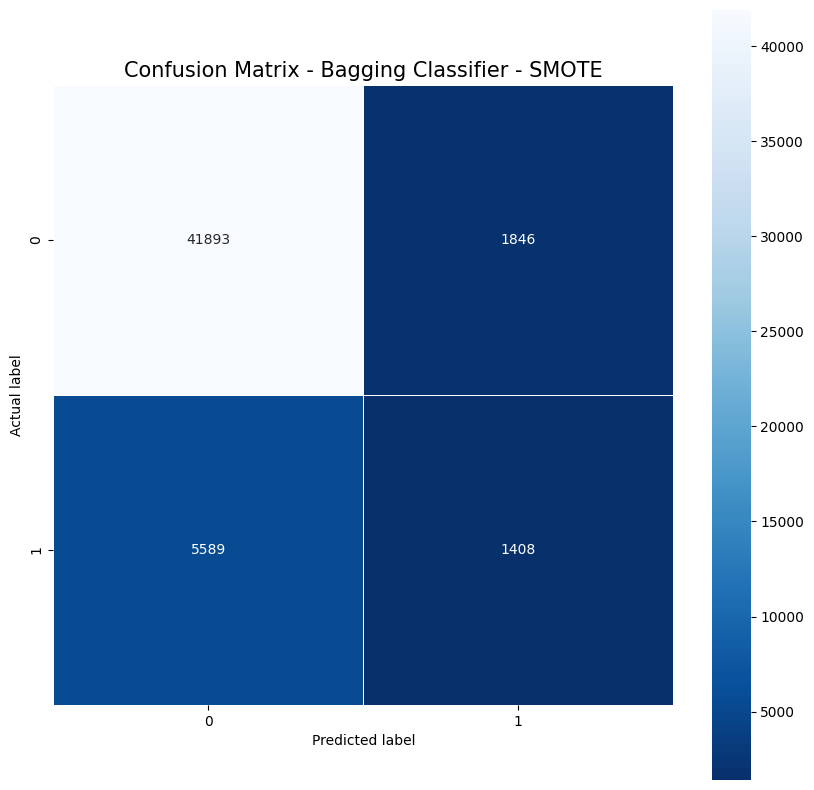

In [ ]:
plot_confusion_matrix(y_test, smote_y_pred, 'Confusion Matrix - Bagging Classifier - SMOTE')

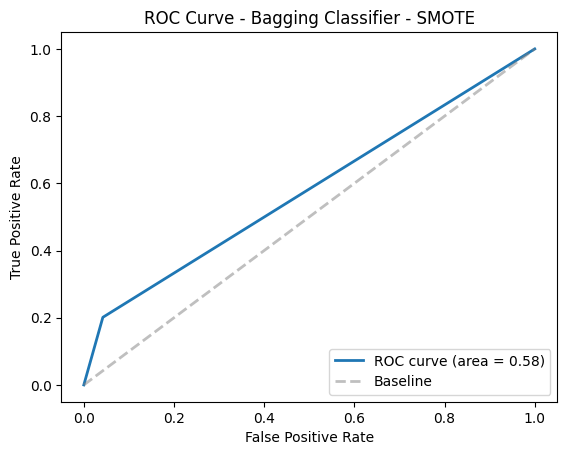

In [ ]:
plot_roc_curve(y_test, smote_y_pred, 'ROC Curve - Bagging Classifier - SMOTE')